
# **Metabolic Syndrome Analysis**
### *Final Project – Python for Data Science*

**Author:** Felipe Fernando Calvo de Freitas  
**Institution:** Université Paris Dauphine – PSL  
**Date:** November 2025  

</div>


In [1]:
# Importing required modules
import numpy as np                 
import pandas as pd               
import seaborn as sns             
import matplotlib.pyplot as plt   


In [3]:
# Loading the dataset
df = pd.read_csv("C:\\Users\\felif\\Desktop\\PARIS\\DAUPHINE\\Python for Data Science\\Project\\metabolic_syndrome.txt", sep=",")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2009 non-null   int64  
 1   Sex                2009 non-null   object 
 2   Marital            2009 non-null   object 
 3   Income             2009 non-null   float64
 4   Race               2009 non-null   object 
 5   WaistCirc          2009 non-null   float64
 6   BMI                2009 non-null   float64
 7   Albuminuria        2009 non-null   int64  
 8   UrAlbCr            2009 non-null   float64
 9   UricAcid           2009 non-null   float64
 10  BloodGlucose       2009 non-null   int64  
 11  HDL                2009 non-null   int64  
 12  Triglycerides      2009 non-null   int64  
 13  MetabolicSyndrome  2009 non-null   object 
dtypes: float64(5), int64(5), object(4)
memory usage: 219.9+ KB


,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,49.263813,4147.187656,98.524141,28.733499,0.147337,42.253375,5.491488,108.008462,53.551020,126.892982
std,17.421740,2984.597463,16.306348,6.580322,0.416533,241.419903,1.428865,33.636746,15.012329,89.818470
min,20.000000,300.000000,63.100000,15.700000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,35.000000,1600.000000,86.900000,24.100000,0.000000,4.460000,4.500000,92.000000,43.000000,75.000000
50%,49.000000,3500.000000,97.100000,27.700000,0.000000,6.960000,5.400000,100.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.800000,32.100000,0.000000,13.490000,6.400000,110.000000,62.000000,149.000000
max,80.000000,9000.000000,170.500000,68.700000,2.000000,4462.810000,11.300000,382.000000,150.000000,1311.000000


In [4]:
# Doubt: Albuminuria data seems to be categorical, let´s check.
df["Albuminuria"].unique()


array([0, 1, 2])

In [5]:
df["Albuminuria"].sample(15, random_state=15)
# Yes, it is. Let´s include it in categorical variables.

1293    0
1410    0
1437    0
1576    0
1993    0
1173    0
1189    0
400     0
703     1
906     0
733     0
1622    0
1922    0
1522    0
1713    1
Name: Albuminuria, dtype: int64

In [6]:
albuminuria_levels = {
    0: "Normal (<30 mg/g) – no significant kidney damage",
    1: "Microalbuminuria (30–300 mg/g) – early kidney stress",
    2: "Macroalbuminuria (>300 mg/g) – significant kidney damage"
}

for level, description in albuminuria_levels.items():
    print(f"Albuminuria {level}: {description}")



Albuminuria 0: Normal (<30 mg/g) – no significant kidney damage
Albuminuria 1: Microalbuminuria (30–300 mg/g) – early kidney stress
Albuminuria 2: Macroalbuminuria (>300 mg/g) – significant kidney damage


In [7]:
# Data transformations to make
df["Albuminuria"] = df["Albuminuria"].astype("category")
df["Sex"] = df["Sex"].astype("category")
df["Marital"] = df["Marital"].astype("category")
df["Race"] = df["Race"].astype("category")
df["MetabolicSyndrome"] = df["MetabolicSyndrome"].astype("category")
df.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2009 entries, 0 to 2008
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                2009 non-null   int64   
 1   Sex                2009 non-null   category
 2   Marital            2009 non-null   category
 3   Income             2009 non-null   float64 
 4   Race               2009 non-null   category
 5   WaistCirc          2009 non-null   float64 
 6   BMI                2009 non-null   float64 
 7   Albuminuria        2009 non-null   category
 8   UrAlbCr            2009 non-null   float64 
 9   UricAcid           2009 non-null   float64 
 10  BloodGlucose       2009 non-null   int64   
 11  HDL                2009 non-null   int64   
 12  Triglycerides      2009 non-null   int64   
 13  MetabolicSyndrome  2009 non-null   category
dtypes: category(5), float64(5), int64(4)
memory usage: 152.0 KB


In [8]:
# Plot configurations so they look better (for all following plots)
plt.rcParams['figure.dpi'] = 140        
plt.rcParams['savefig.dpi'] = 140
plt.rcParams['figure.facecolor'] = "white"
plt.rcParams['axes.facecolor'] = "white"
sns.set_theme(style="whitegrid")


In [9]:
# Variable lists
var_descr = {
    "MetSyn": "Metabolic syndrome status (Target variable)",
    "Sex": "Gender",
    "Marital": "Marital status category",
    "Income": "Monthly income (USD)",
    "Race": "Ethnicity group",
    "WaistCirc": "Waist circumference (cm)",
    "BMI": "Body Mass Index",
    "Albuminuria": "Kidney damage marker (0–2)",
    "UrAlbCr": "Urine albumin–creatinine ratio",
    "UricAcid": "Uric acid level (mg/dL)",
    "BloodGlucose": "Blood glucose level (mg/dL)",
    "HDL": "High-density lipoprotein cholesterol",
    "Triglycerides": "Triglyceride concentration (mg/dL)"
}
pd.DataFrame.from_dict(var_descr, orient="index", columns=["Description"])


,Description
MetSyn,Metabolic syndrome status (Target variable)
Sex,Gender
Marital,Marital status category
Income,Monthly income (USD)
Race,Ethnicity group
WaistCirc,Waist circumference (cm)
BMI,Body Mass Index
Albuminuria,Kidney damage marker (0–2)
UrAlbCr,Urine albumin–creatinine ratio
UricAcid,Uric acid level (mg/dL)


MetabolicSyndrome
No MetSyn    1297
MetSyn        712
Name: count, dtype: int64


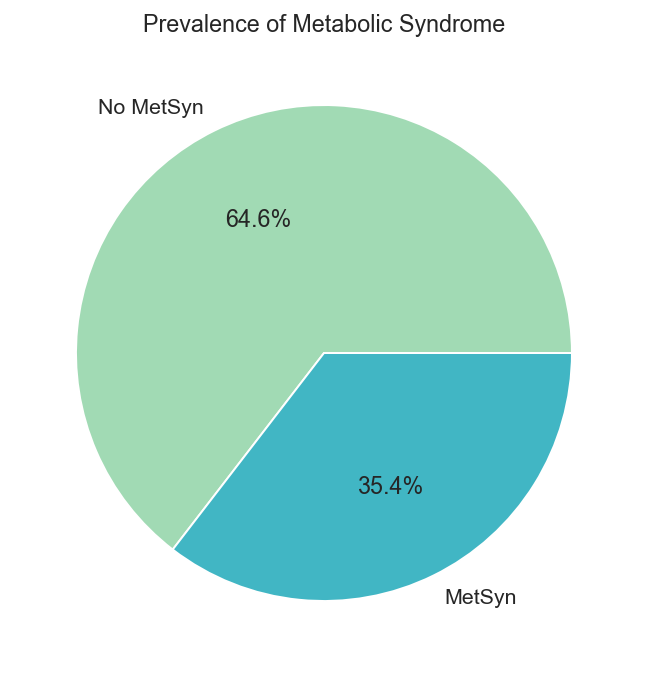

In [10]:
# 1. Frequency of Metabolic Syndrome
syndrome_counts = df["MetabolicSyndrome"].value_counts()
print(syndrome_counts)
(syndrome_counts / len(df) * 100).round(1)

# Pie chart of Metabolic Syndrome prevalence
fig, ax = plt.subplots(figsize=(6, 5))
df["MetabolicSyndrome"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    colors=["#a1dab4", "#41b6c4"],
    ax=ax
)
ax.set(
    title="Prevalence of Metabolic Syndrome",
    ylabel=""
)
ax.set_aspect("equal")  
plt.tight_layout()
plt.show()



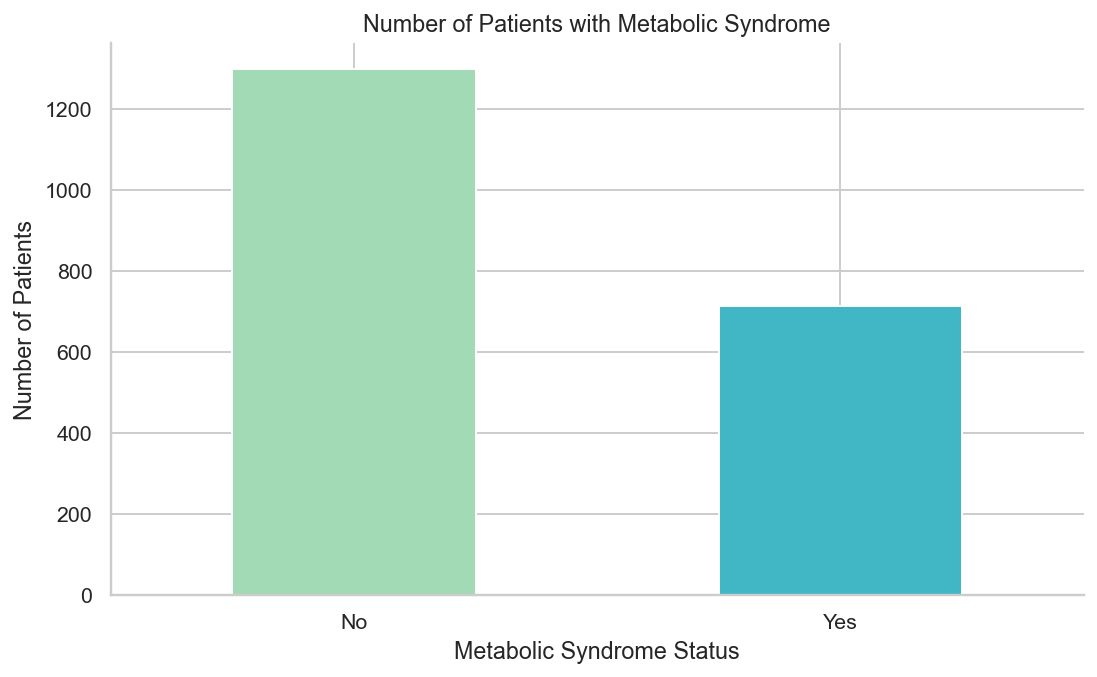

In [11]:

# Metabolic Syndrome presence in numbers
plt.figure(figsize=(8, 5))
order = ["No MetSyn", "MetSyn"]
df["MetabolicSyndrome"].value_counts().loc[order].plot(
    kind="bar",
    color=["#a1dab4", "#41b6c4"] 
)
plt.title("Number of Patients with Metabolic Syndrome")
plt.xlabel("Metabolic Syndrome Status")
plt.ylabel("Number of Patients")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"], rotation=0)
sns.despine()
plt.tight_layout()
plt.show()



In [12]:
# 2. Distributions of variables:
# A. Numerical Variables
num_vars = [
    "Age",
    "WaistCirc",
    "BMI",
    "UricAcid",
    "BloodGlucose",
    "HDL",
    "Triglycerides",
    "Income",
    "UrAlbCr"
]
df[num_vars].describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
Age,2009.0,49.26,17.42,20.0,35.00,49.00,63.00,80.00
WaistCirc,2009.0,98.52,16.31,63.1,86.90,97.10,107.80,170.50
BMI,2009.0,28.73,6.58,15.7,24.10,27.70,32.10,68.70
UricAcid,2009.0,5.49,1.43,1.8,4.50,5.40,6.40,11.30
BloodGlucose,2009.0,108.01,33.64,39.0,92.00,100.00,110.00,382.00
HDL,2009.0,53.55,15.01,14.0,43.00,51.00,62.00,150.00
Triglycerides,2009.0,126.89,89.82,26.0,75.00,103.00,149.00,1311.00
Income,2009.0,4147.19,2984.60,300.0,1600.00,3500.00,6200.00,9000.00
UrAlbCr,2009.0,42.25,241.42,1.4,4.46,6.96,13.49,4462.81


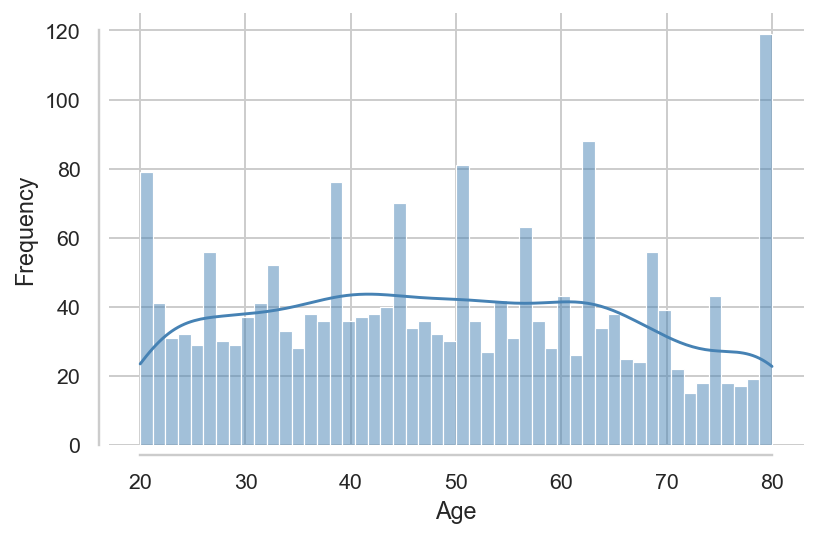

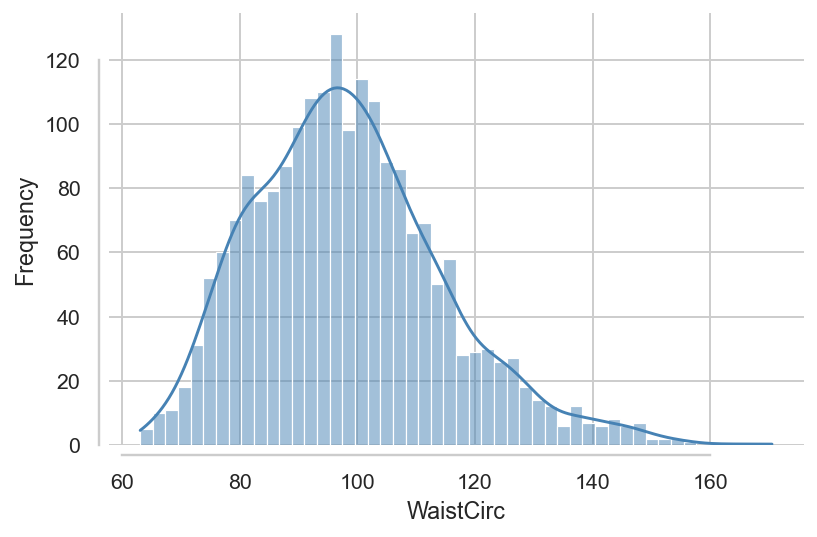

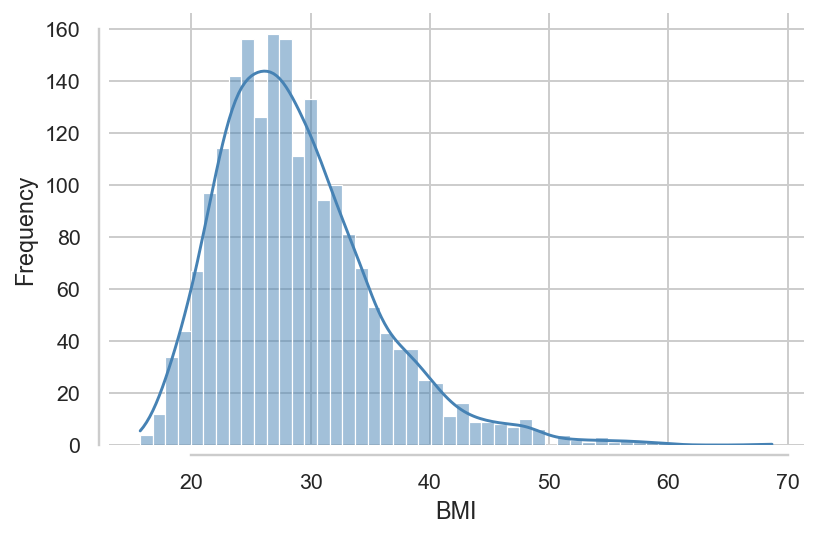

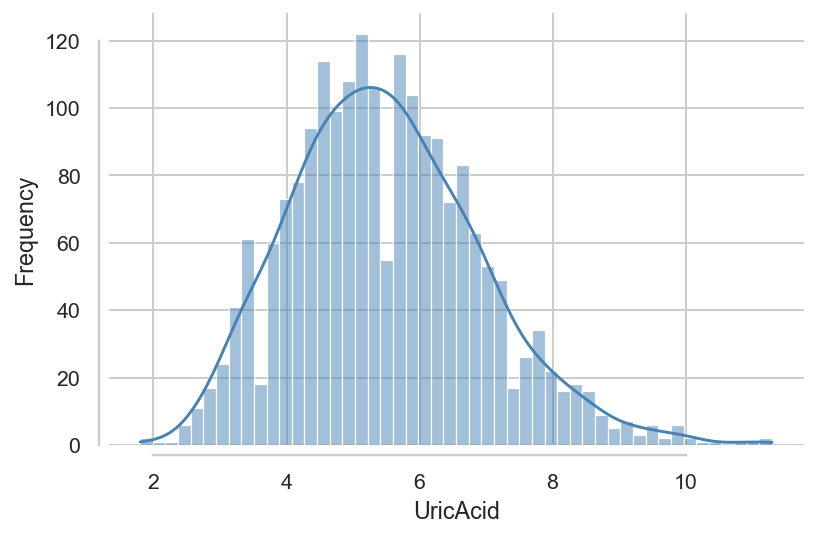

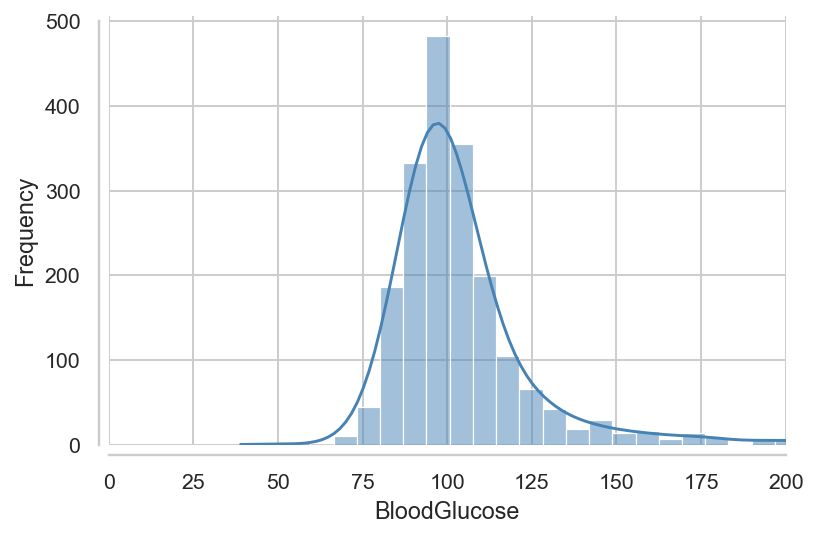

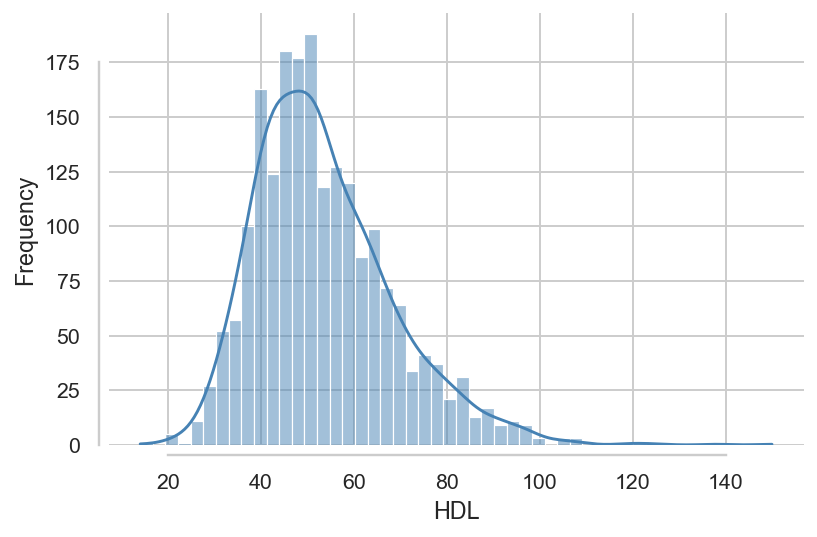

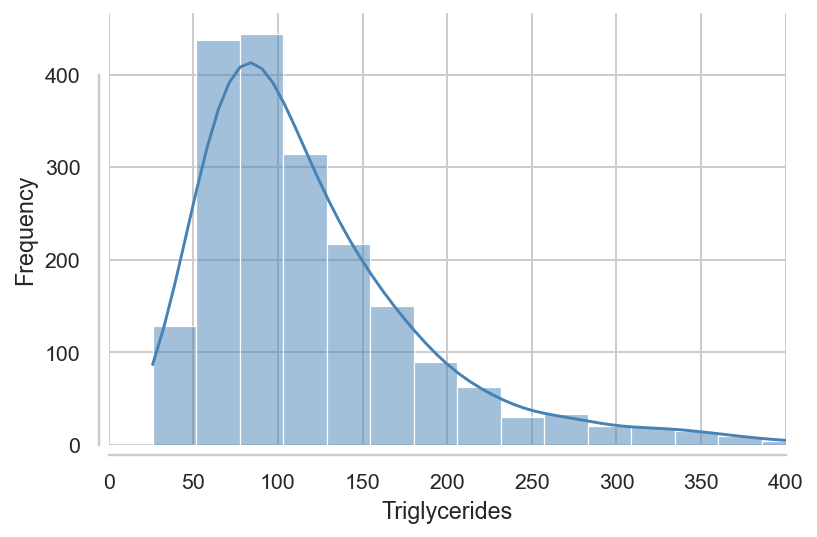

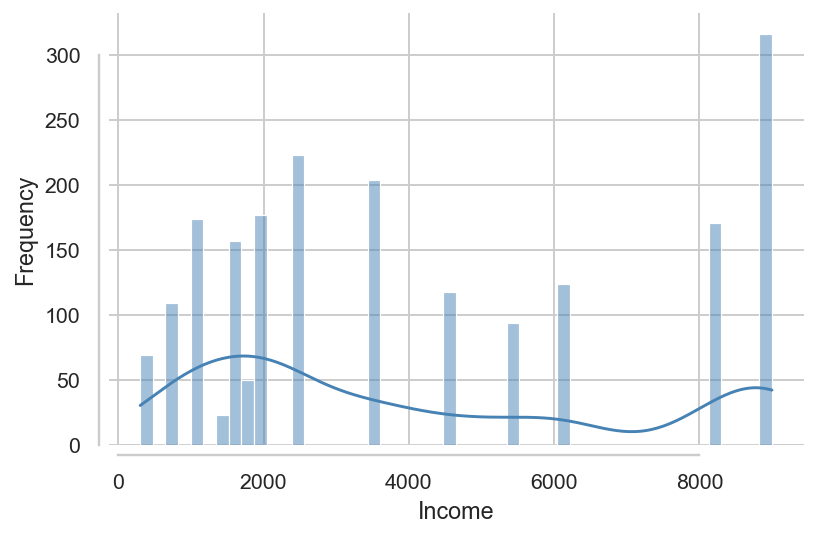

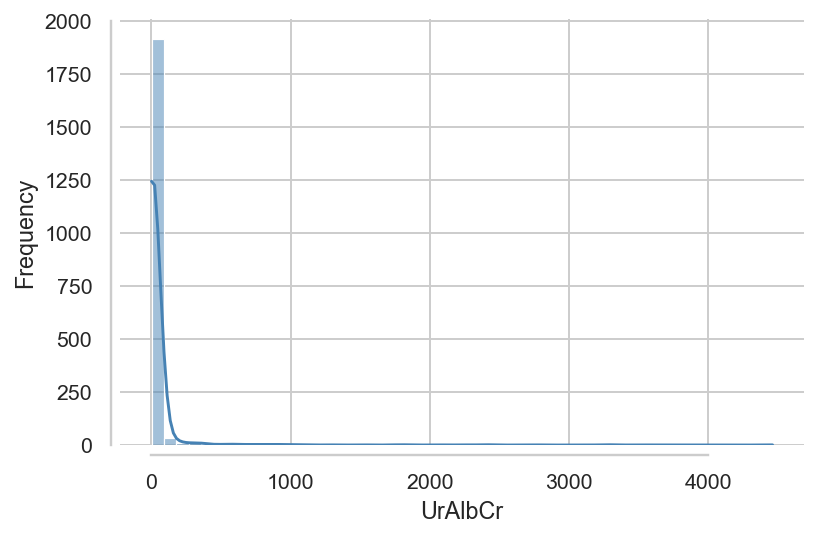

In [13]:
# Plotting histograms for numerical variables
for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(
        data=df,
        x=col,
        kde=True,
        color="steelblue",
        edgecolor=None,
        bins=50
    )

    if col == "Triglycerides":
        plt.xlim(0, 400)
    elif col == "BloodGlucose":
        plt.xlim(0, 200)

    plt.xlabel(col)
    plt.ylabel("Frequency")
    sns.despine(offset=5, trim=True)
    plt.tight_layout()
    plt.show()


In [14]:
# Unexpected observations:
""" We can start seeing that some variables have a high standard deviation compared to their mean and a skewed distribution.
Let´s check. """
(df[num_vars] > (df[num_vars].quantile(0.75) + 1.5 * (df[num_vars].quantile(0.75) - df[num_vars].quantile(0.25)))).sum()


Age                0
WaistCirc         40
BMI               58
UricAcid          25
BloodGlucose     177
HDL               43
Triglycerides    130
Income             0
UrAlbCr          269
dtype: int64

In [15]:
# UrAlbCr distribution has large number of them. Let´s see some samples:
print(df["UrAlbCr"].sample(50, random_state=42).values)


[  10.83    6.14  806.58    3.04   15.38   26.9     5.69    3.92    5.7
   11.27    5.95    4.67   10.46   12.84   13.    301.05   14.      4.6
    4.14    9.63   24.46    5.38   11.29    8.72 2403.85    5.74    7.41
    5.85    3.2     9.36   18.3    12.12  821.71    7.2     8.02    8.91
    3.53  319.15    7.14    6.27    3.71    5.85    4.73    9.03    7.19
    2.87    7.31   11.96    6.95    3.1 ]


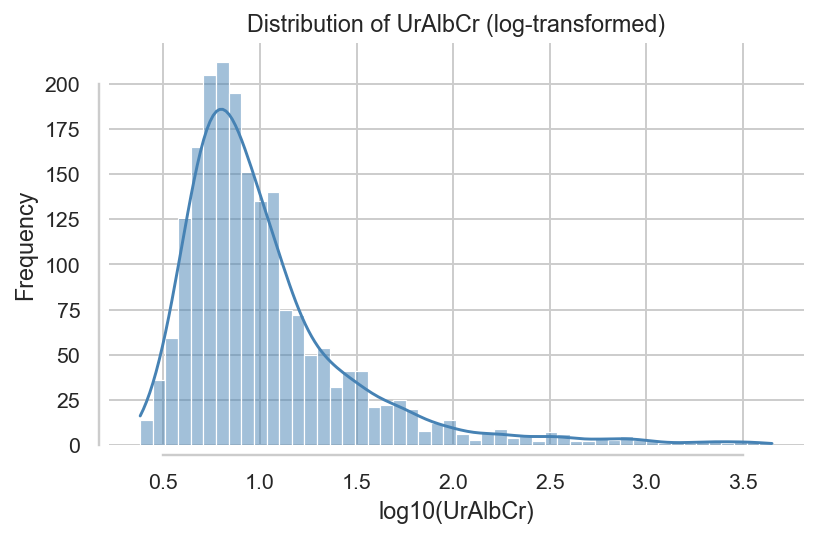

In [17]:
# Let´s do a log transform for UrAlbCr, so we can visualize it better.
df["UrAlbCr_log"] = np.log10(df["UrAlbCr"] + 1)   

# Log-transformed Histogram for UrAlbCr
plt.figure(figsize=(6,4))
sns.histplot(
    data=df[df["UrAlbCr"] > 0],
    x="UrAlbCr_log",
    kde=True,
    color="steelblue",
    edgecolor=None,
    bins=50
)
plt.xlabel("log10(UrAlbCr)")
plt.ylabel("Frequency")
plt.title("Distribution of UrAlbCr (log-transformed)")
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.show()



In [19]:
# B. Categorical Variables
cat_vars = ["Sex", "Marital", "Albuminuria", "Race"]   # Remember: we include Albuminuria here as categorical rather than numerical (values 0, 1 and 2)
df[["Sex", "Marital", "Albuminuria", "Race"]].describe().T 


,count,unique,top,freq
Sex,2009,2,Female,1022
Marital,2009,5,Married,1098
Albuminuria,2009,3,0,1761
Race,2009,6,White,806


In [20]:
# As the categorical variables have few unique values, we can show their value counts as percentages. 
for col in cat_vars:
    print(f"\n{col} value counts (n and %):")
    
    counts = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100

    summary = pd.DataFrame({
        "Count": counts,
        "Percent (%)": perc.round(1)
    })

    display(summary)
    


Sex value counts (n and %):


,Count,Percent (%)
Sex,,
Female,1022,50.9
Male,987,49.1



Marital value counts (n and %):


,Count,Percent (%)
Marital,,
Married,1098,54.7
Single,460,22.9
Divorced,219,10.9
Widowed,144,7.2
Separated,88,4.4



Albuminuria value counts (n and %):


,Count,Percent (%)
Albuminuria,,
0,1761,87.7
1,200,10.0
2,48,2.4



Race value counts (n and %):


,Count,Percent (%)
Race,,
White,806,40.1
Black,462,23.0
Asian,295,14.7
Hispanic,198,9.9
MexAmerican,198,9.9
Other,50,2.5


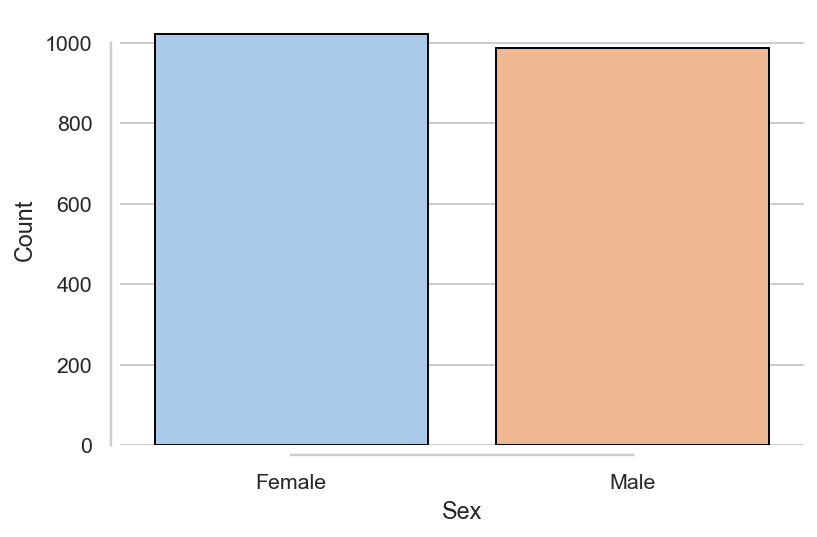

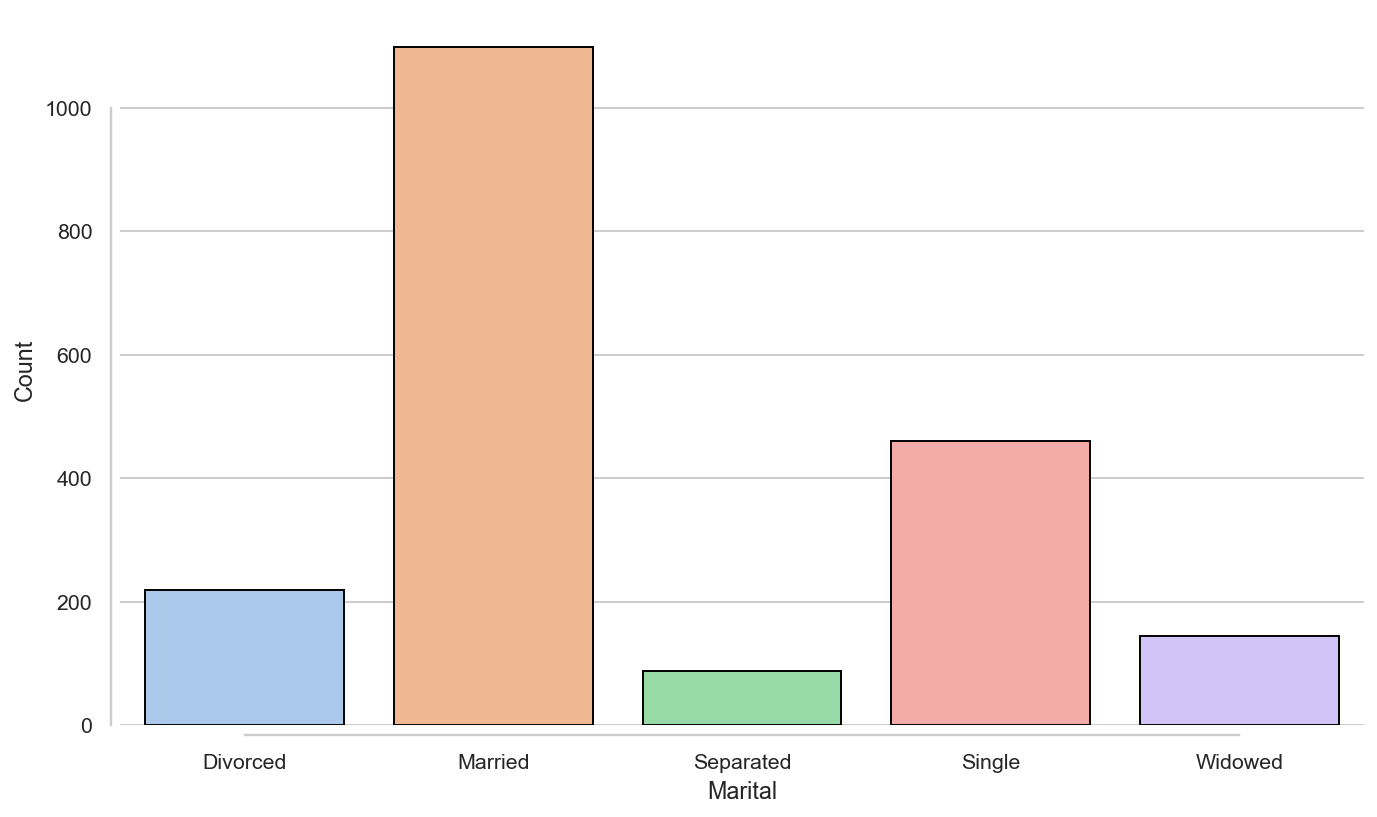

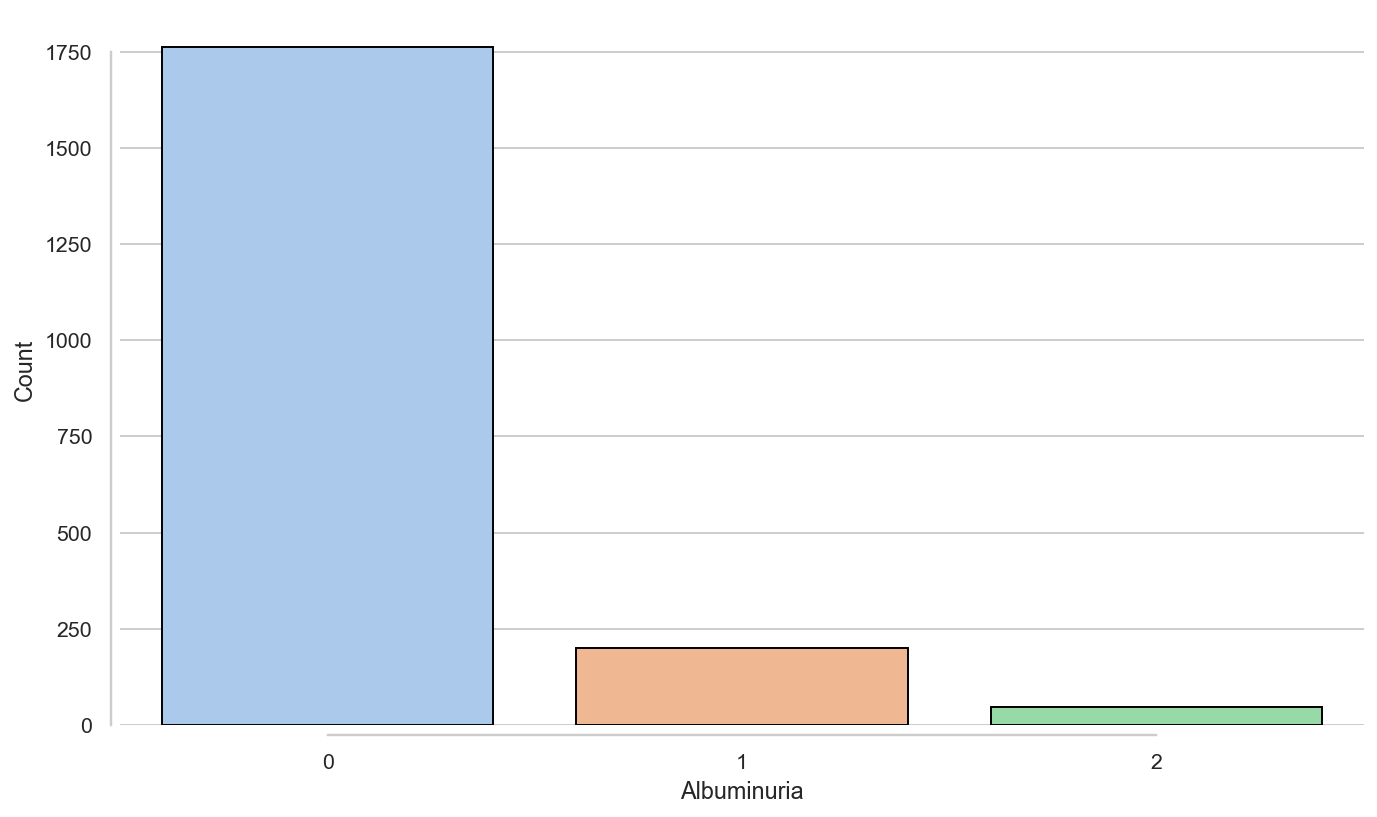

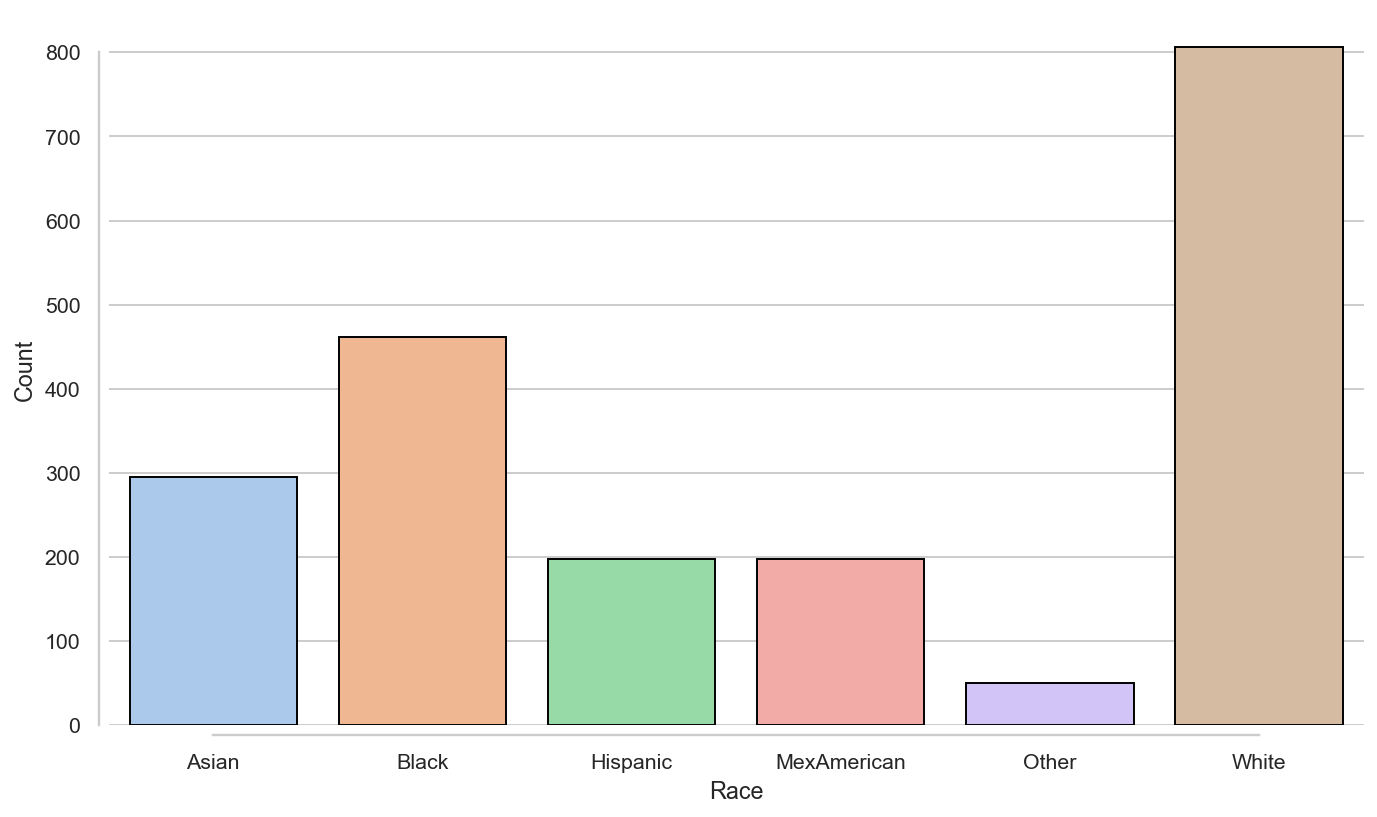

In [21]:
# Plotting countplots for categorical variables
for col in cat_vars:
    if col == "Sex":
        plt.figure(figsize=(6,4))
    else:
        plt.figure(figsize=(10,6))
    sns.countplot(
        data=df,
        x=col,
        hue=col,
        palette="pastel",
        edgecolor="black",
        legend=False
    )
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    sns.despine(offset=5, trim=True)
    plt.tight_layout()
    plt.show()


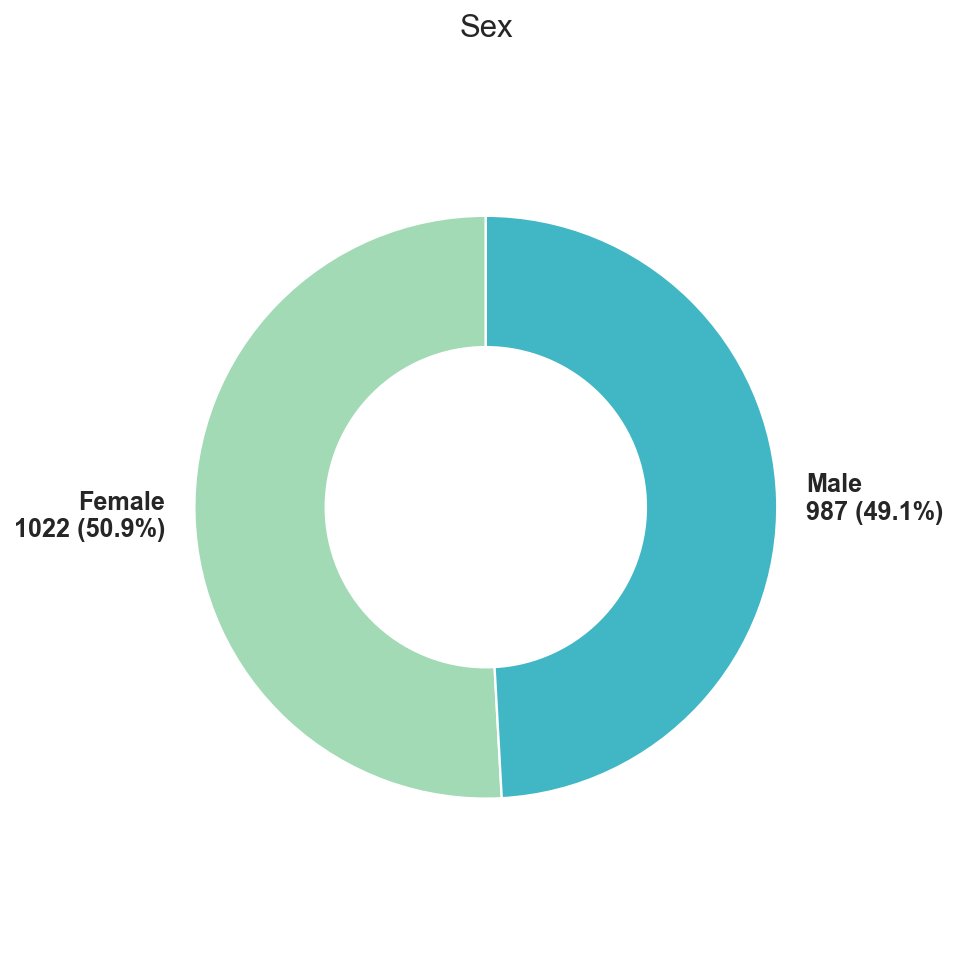

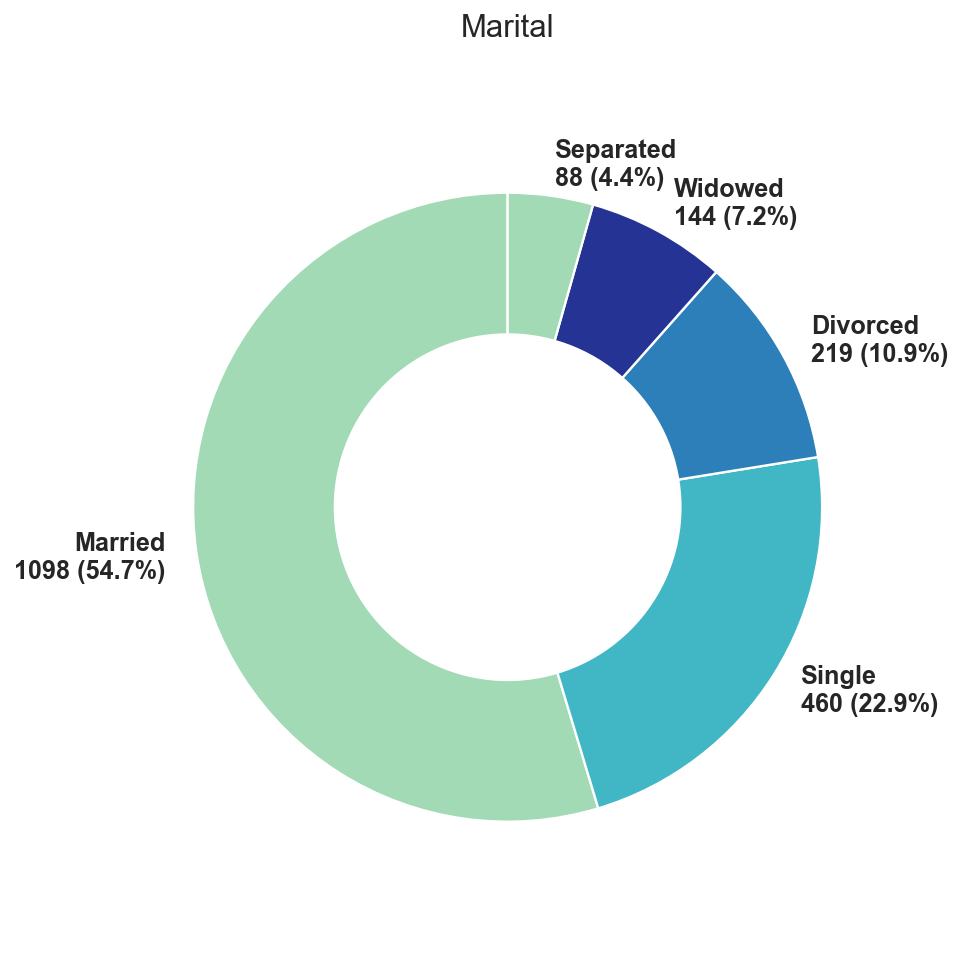

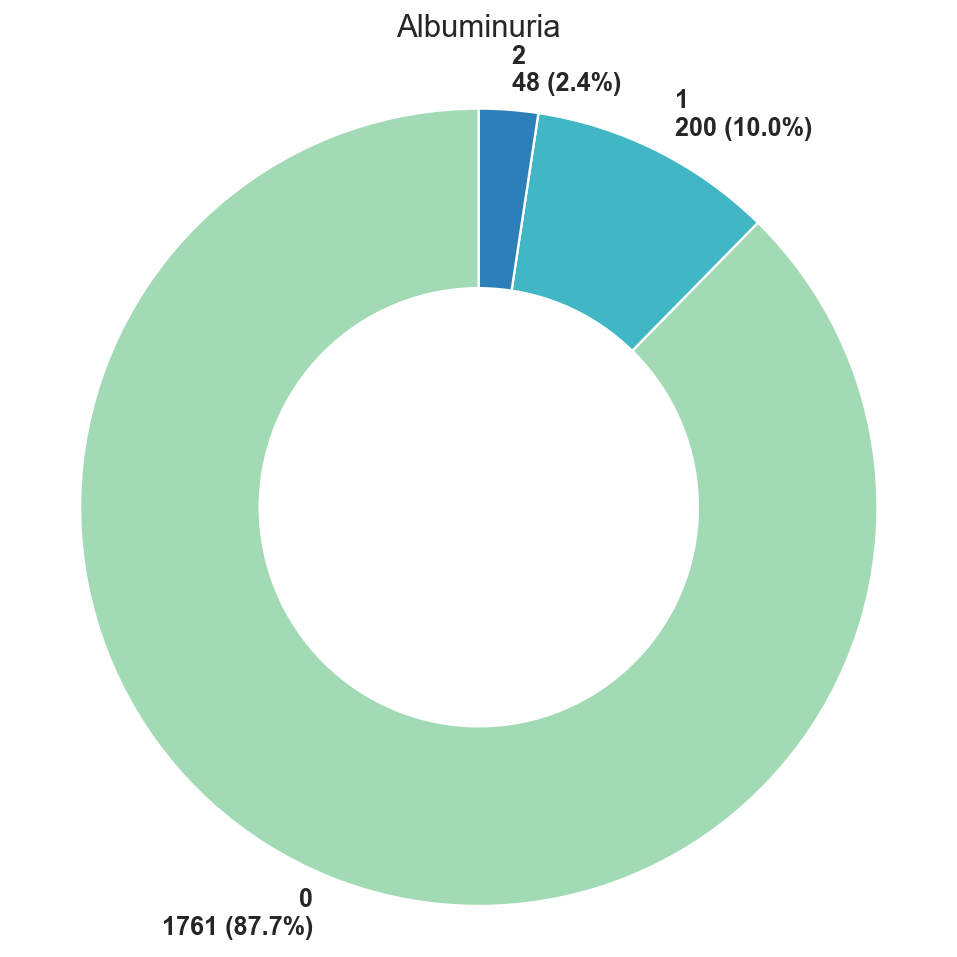

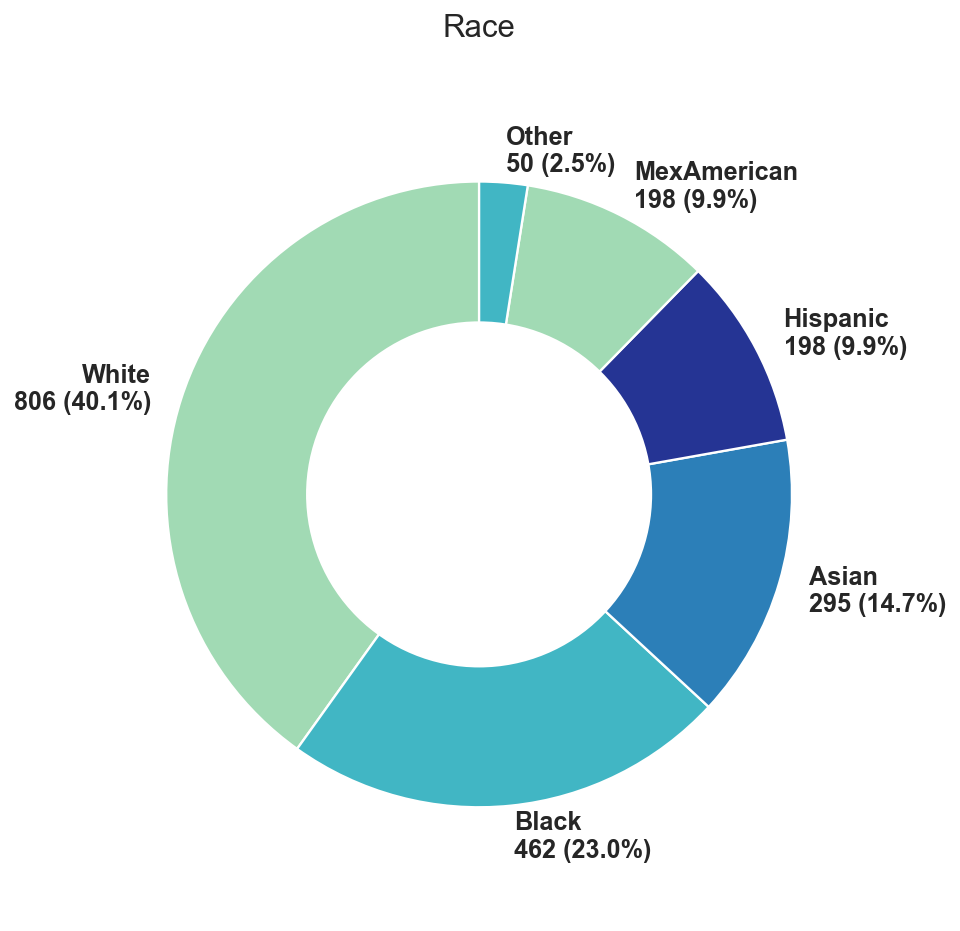

In [23]:
# Donut plots for categorical variables

def cheese_plot(df, column, 
                colors=["#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]):

    # 1. Get counts and percentages
    counts = df[column].value_counts(dropna=False)
    perc = df[column].value_counts(normalize=True, dropna=False) * 100

    # 2. Labels
    labels = [
        f"{str(cat)}\n{counts[cat]} ({perc[cat]:.1f}%)"
        for cat in counts.index
    ]

    # 3. Plot
    fig, ax = plt.subplots(figsize=(7, 7))

    wedges, texts = ax.pie(
        counts.values,
        labels=labels,
        colors=colors[:len(counts)],
        startangle=90,
        wedgeprops={"edgecolor": "white", "linewidth": 1.2},
        textprops={"fontsize": 13, "weight": "bold"}
    )

    # 4. Donut shape
    centre_circle = plt.Circle((0, 0), 0.55, fc="white")
    ax.add_artist(centre_circle)

    # 5. Title 
    ax.set_title(
        f"{column}",
        fontsize=16,
        pad=18
    )

    ax.axis('equal')
    plt.tight_layout()
    plt.show()

# Run it
cheese_plot(df, "Sex")
cheese_plot(df, "Marital")
cheese_plot(df, "Albuminuria")
cheese_plot(df, "Race")


In [24]:
# 3. Interaction between variables 
# 3.1. Biological differences?
""" We will split the dataset by gender and observe if there are any differences 
in the distributions of the biological variables. """
# Biological variables list: WaistCirc, BMI, UricAcid, BloodGlucose, HDL, Triglycerides, UrAlbCr & Albuminuria
bio_nvars = ["WaistCirc", "BMI", "UricAcid",
                "BloodGlucose", "HDL", "Triglycerides", "UrAlbCr"]   # We will start with the biological numerical variables
df.groupby("Sex")[bio_nvars].describe().transpose()


C:\Users\felif\AppData\Local\Temp\ipykernel_4044\2327898220.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Sex")[bio_nvars].describe().transpose()


Sex                       Female         Male
WaistCirc     count  1022.000000   987.000000
              mean     96.594129   100.522594
              std      16.735598    15.608366
              min      63.100000    65.800000
              25%      84.000000    89.950000
              50%      95.250000    99.400000
              75%     106.350000   109.250000
              max     170.500000   154.700000
BMI           count  1022.000000   987.000000
              mean     29.064971    28.390274
              std       7.252130     5.787066
              min      15.700000    15.700000
              25%      23.700000    24.400000
              50%      27.850000    27.600000
              75%      33.300000    31.200000
              max      68.700000    54.100000
UricAcid      count  1022.000000   987.000000
              mean      4.931507     6.071327
              std       1.355175     1.262768
              min       1.800000     2.700000
              25%       4.000000     5.200000
              50%       4.800000     6.000000
              75%       5.675000     6.800000
              max      11.200000    11.300000
BloodGlucose  count  1022.000000   987.000000
              mean    105.035225   111.087133
              std      31.682539    35.300226
              min      47.000000    39.000000
              25%      90.000000    95.000000
              50%      97.000000   102.000000
              75%     107.750000   112.000000
              max     382.000000   365.000000
HDL           count  1022.000000   987.000000
              mean     58.278865    48.655522
              std      14.922179    13.462324
              min      21.000000    14.000000
              25%      48.000000    40.000000
              50%      56.000000    46.000000
              75%      67.000000    55.000000
              max     138.000000   150.000000
Triglycerides count  1022.000000   987.000000
              mean    114.372798   139.857143
              std      69.563005   105.298450
              min      26.000000    26.000000
              25%      71.000000    78.500000
              50%      97.000000   112.000000
              75%     138.000000   164.000000
              max     607.000000  1311.000000
UrAlbCr       count  1022.000000   987.000000
              mean     33.512358    51.304357
              std     175.330519   294.451941
              min       1.540000     1.400000
              25%       5.352500     3.930000
              50%       8.205000     5.740000
              75%      14.797500    11.320000
              max    3284.620000  4462.810000

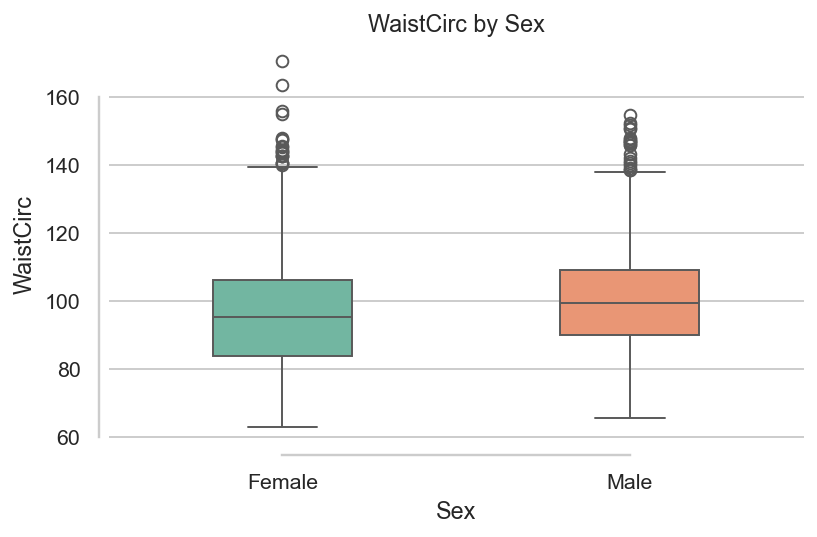

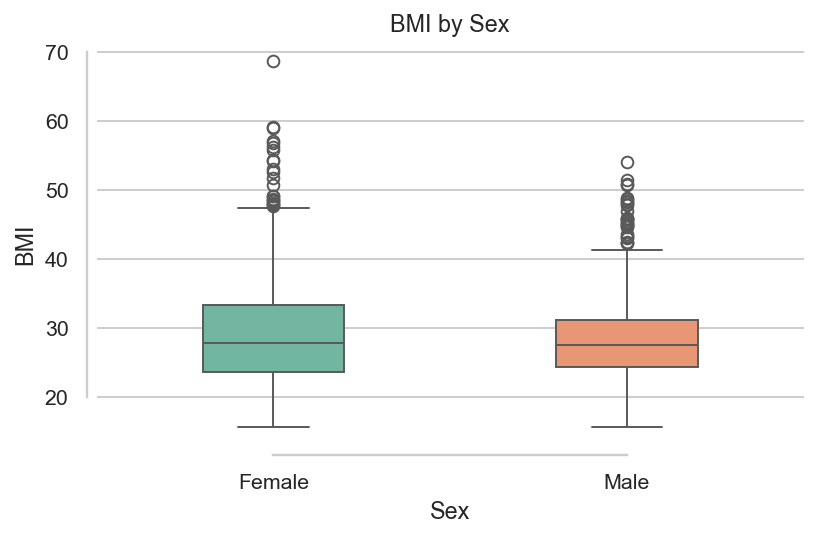

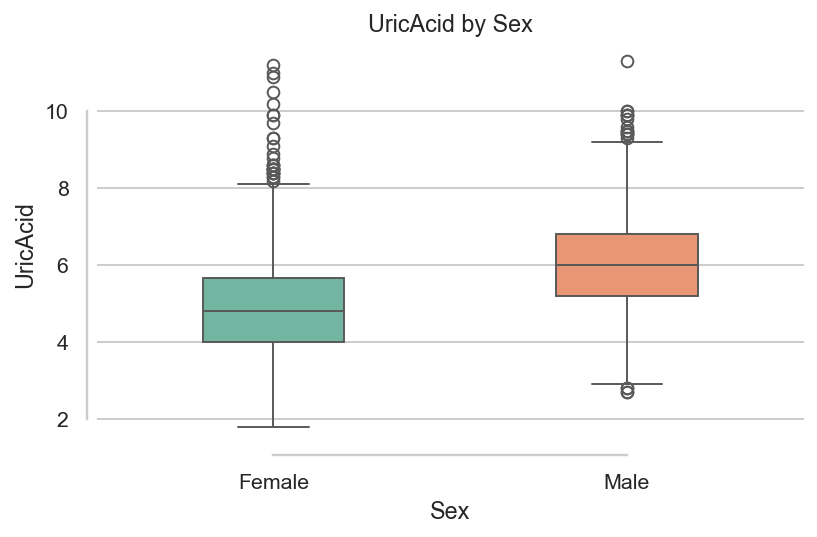

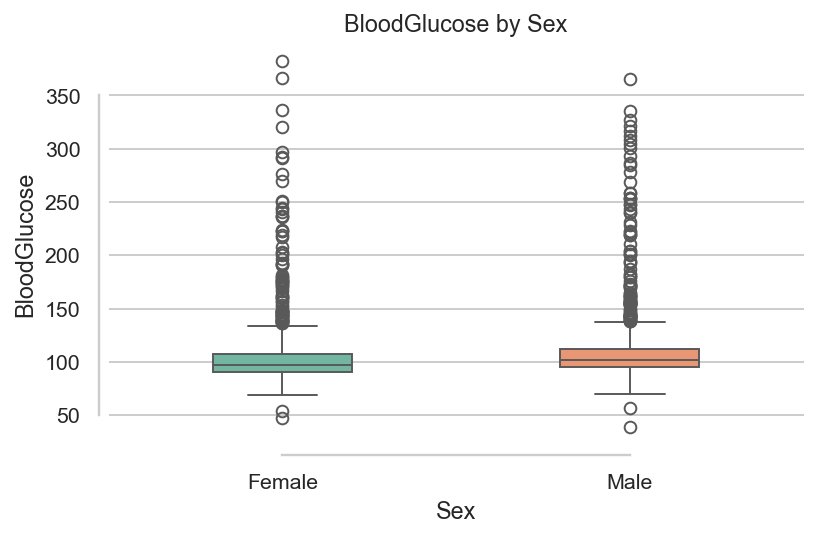

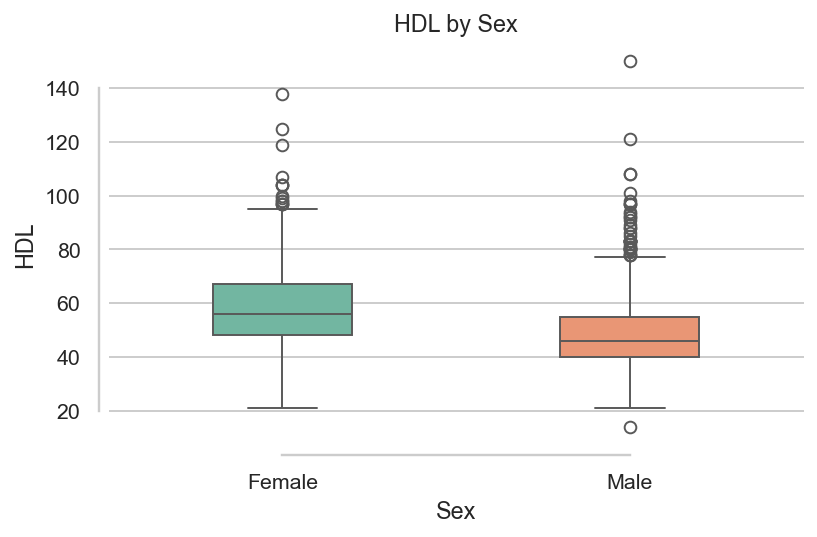

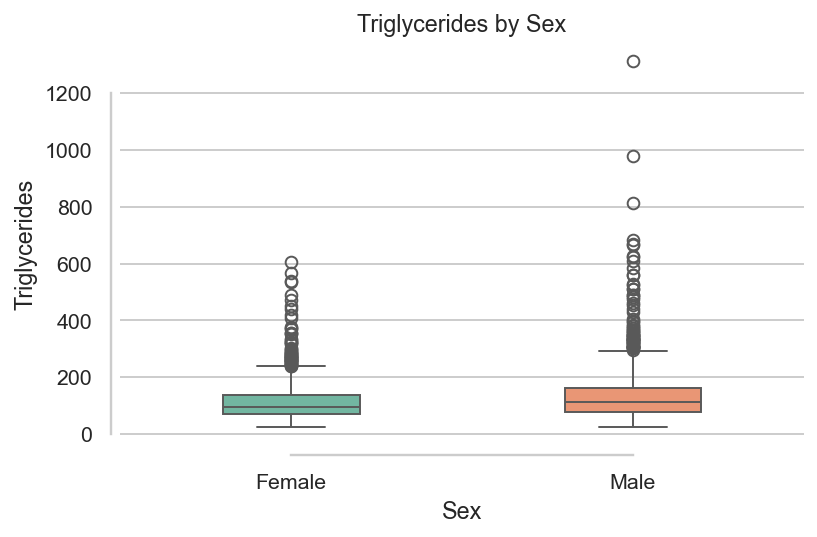

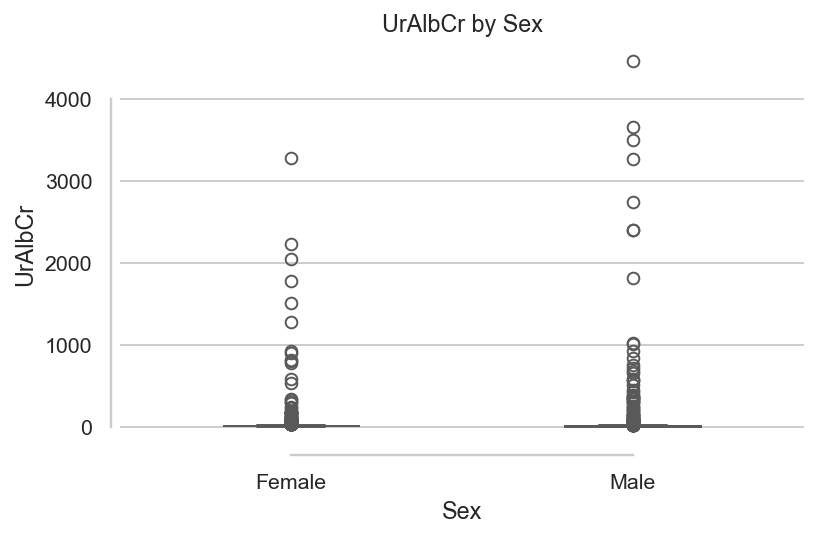

In [25]:
# Plotting boxplots of numerical biological variables by Sex
for col in bio_nvars:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x="Sex",
        y=col,
        hue="Sex",
        palette="Set2",
        width=0.4,
        legend=False
    )
    plt.title(f"{col} by Sex")
    plt.xlabel("Sex")
    plt.ylabel(col)
    sns.despine(offset=5, trim=True)
    plt.tight_layout()
    plt.show()
    

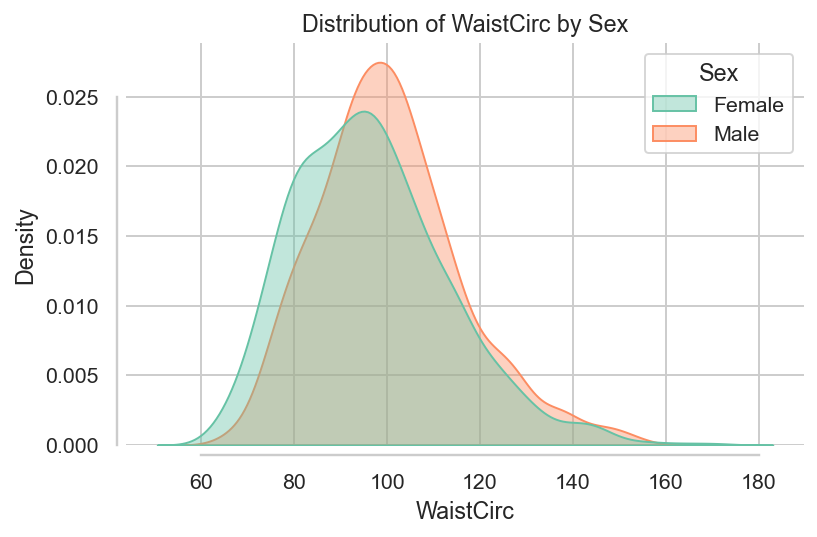

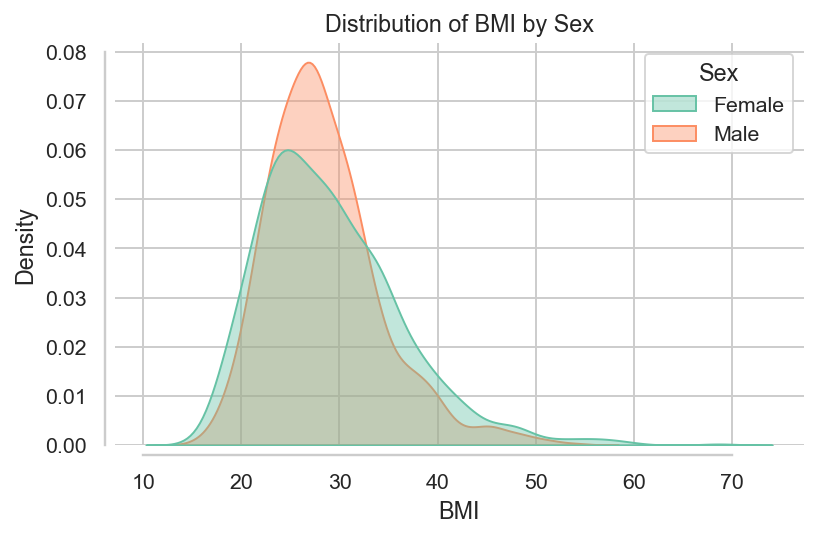

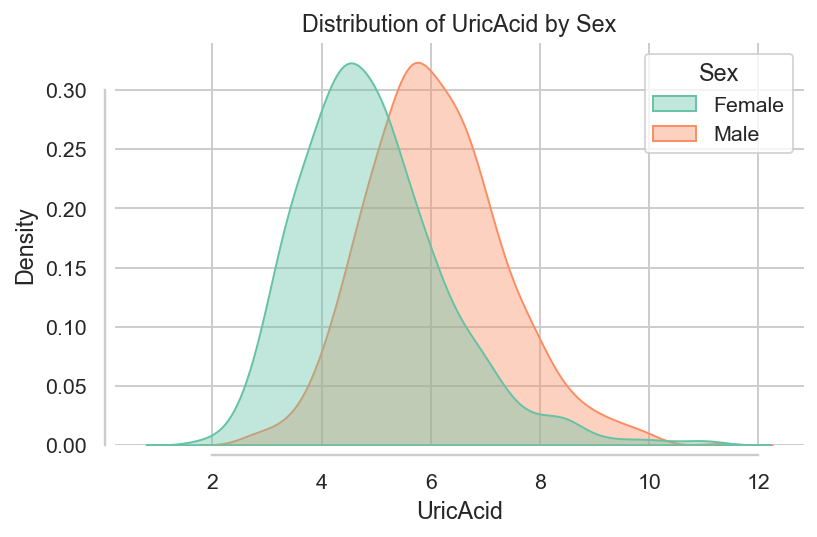

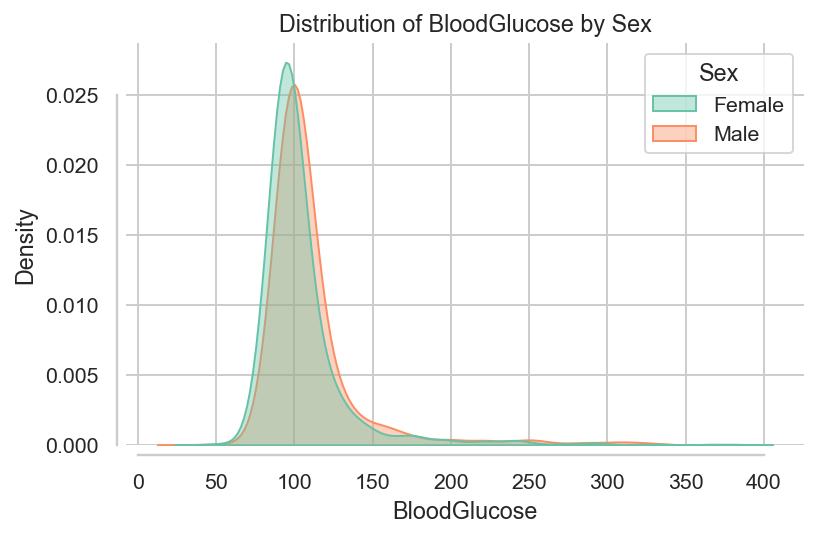

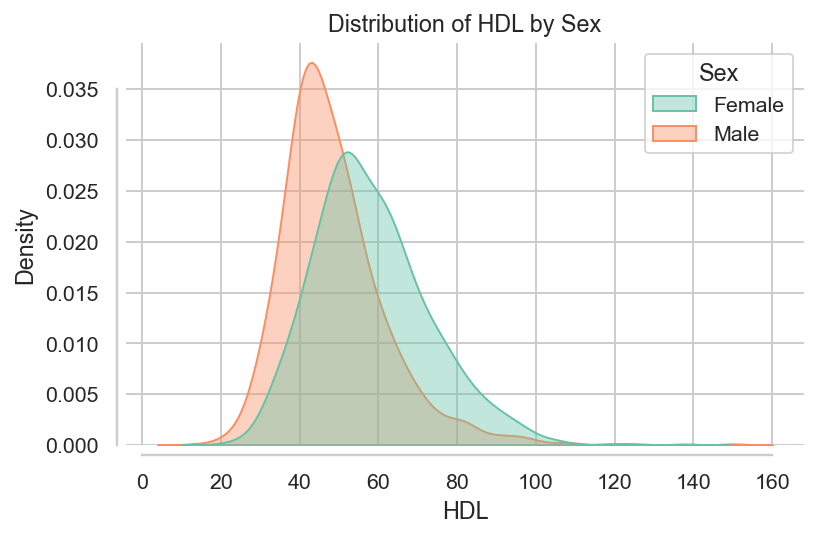

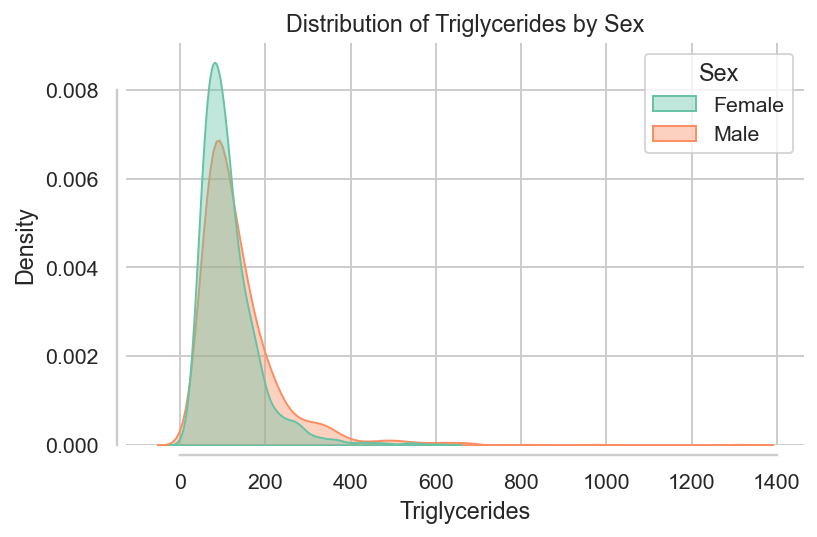

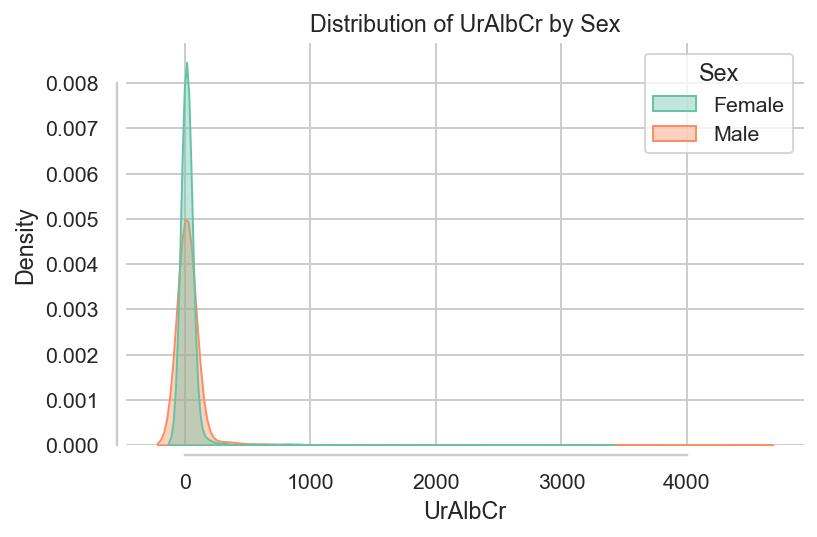

In [26]:
# KDE plots of numerical biological variables by Sex (to observe better the distributions)
for col in bio_nvars:
    plt.figure(figsize=(6,4))
    sns.kdeplot(
        data=df,
        x=col,
        hue="Sex",
        fill=True,
        common_norm=False,
        alpha=0.4,
        palette="Set2"
    )
    plt.title(f"Distribution of {col} by Sex")
    plt.xlabel(col)
    plt.ylabel("Density")
    sns.despine(offset=5, trim=True)
    plt.tight_layout()
    plt.show()


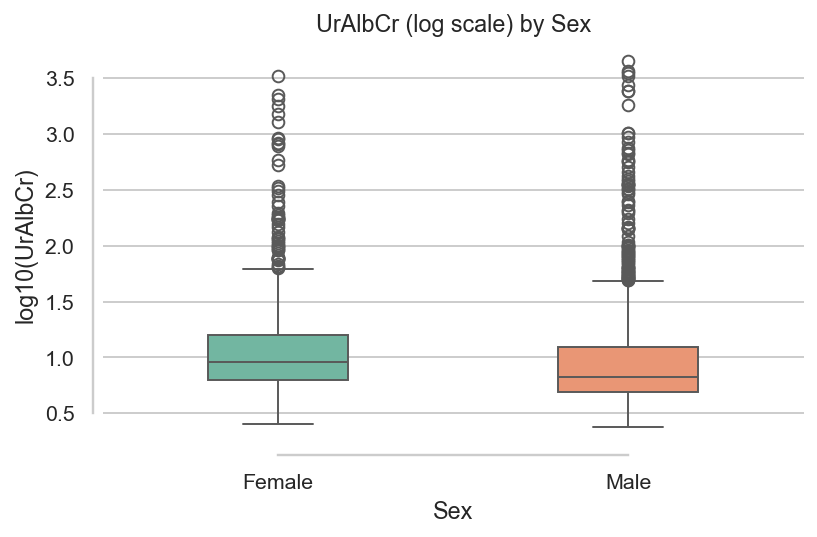

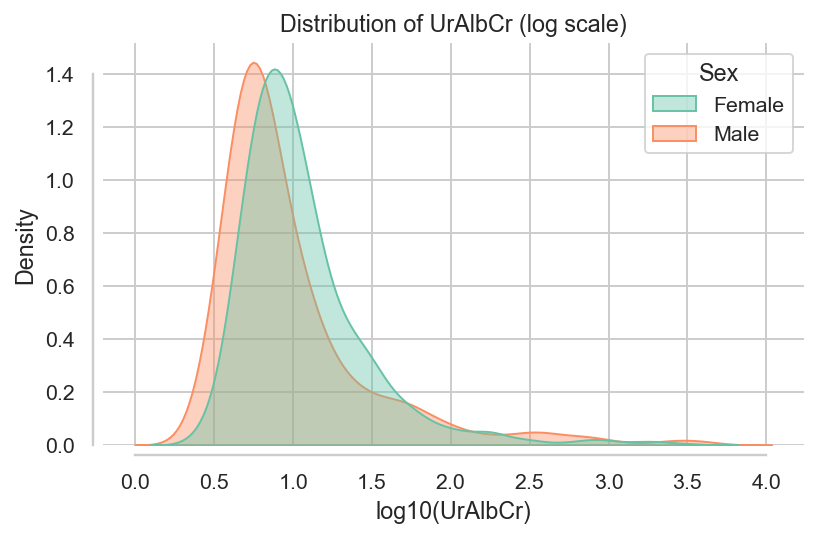

In [27]:
# Urine albumin–creatinine ratio (UrAlbCr) is again not very visible, let´s zoom in.
df["UrAlbCr_log"] = np.log10(df["UrAlbCr"] + 1)  # Log transformation for better visualization

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df[df["UrAlbCr"] > 0],   
    x="Sex",
    y="UrAlbCr_log",
    hue="Sex",             
    palette="Set2",
    width=0.4,
    legend=False           
)
plt.ylabel("log10(UrAlbCr)")
plt.title("UrAlbCr (log scale) by Sex")
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.kdeplot(
    data=df[df["UrAlbCr"] > 0],
    x="UrAlbCr_log",
    hue="Sex",
    fill=True,
    common_norm=False,
    alpha=0.4,
    palette="Set2"
)
plt.xlabel("log10(UrAlbCr)")
plt.title("Distribution of UrAlbCr (log scale)")
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.show()



In [28]:
# What about Albuminuria´s distribution within each sex?
album_tab = (
    pd.crosstab(df["Sex"], df["Albuminuria"], normalize="index") * 100
).round(1)
print("Albuminuria stage distribution by Sex (%):")
display(album_tab)


Albuminuria stage distribution by Sex (%):


Albuminuria,0,1,2
Sex,,,
Female,88.2,10.3,1.6
Male,87.1,9.6,3.2


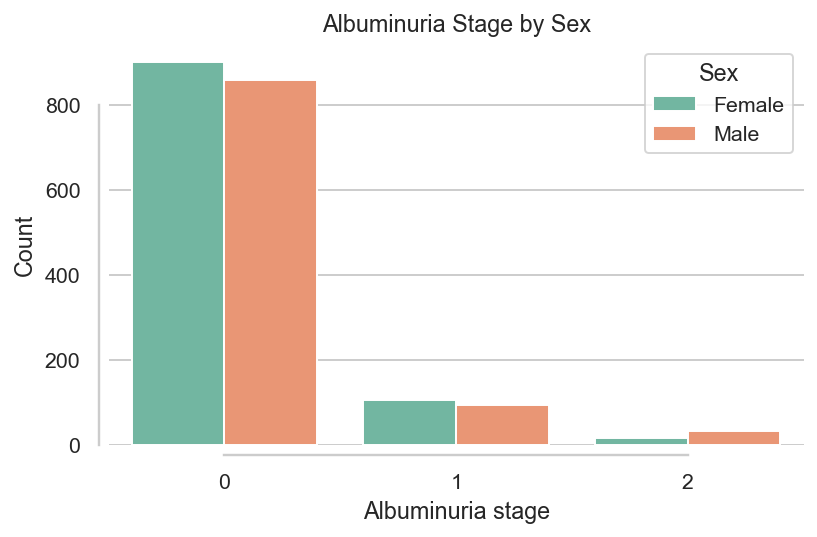

In [30]:
# Countplot of Albuminuria by Sex
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    x="Albuminuria",
    hue="Sex",
    palette="Set2",
    dodge=True
)
plt.title("Albuminuria Stage by Sex")
plt.xlabel("Albuminuria stage")
plt.ylabel("Count")
sns.despine(offset=5, trim=True)
plt.tight_layout()
plt.show()


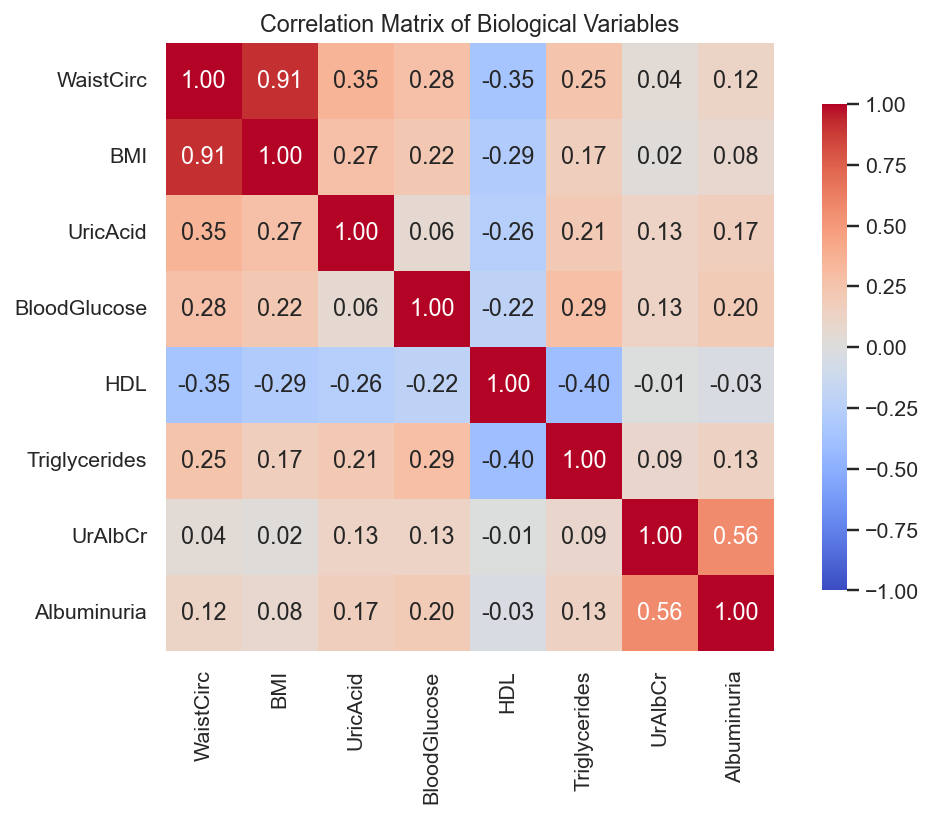

In [31]:
# 3.2. Correlation between biological variables
bio_vars = [
    "WaistCirc",
    "BMI",
    "UricAcid",
    "BloodGlucose",
    "HDL",
    "Triglycerides",
    "UrAlbCr",
    "Albuminuria"
]
corr_matrix = df[bio_vars].corr()
# Heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Biological Variables")
plt.tight_layout()
plt.show()


In [37]:
# Most strong correlations
# We can see some strong correlations between biological variables, such as WaistCirc and BMI (0.91) & Triglycerides and HDL (-0.40). 

strong_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)
strong_pairs[strong_pairs.abs() > 0.3]    # To filter only for strong correlations



WaistCirc  BMI              0.909467
UrAlbCr    Albuminuria      0.564887
WaistCirc  UricAcid         0.351764
           HDL             -0.353359
HDL        Triglycerides   -0.400794
dtype: float64

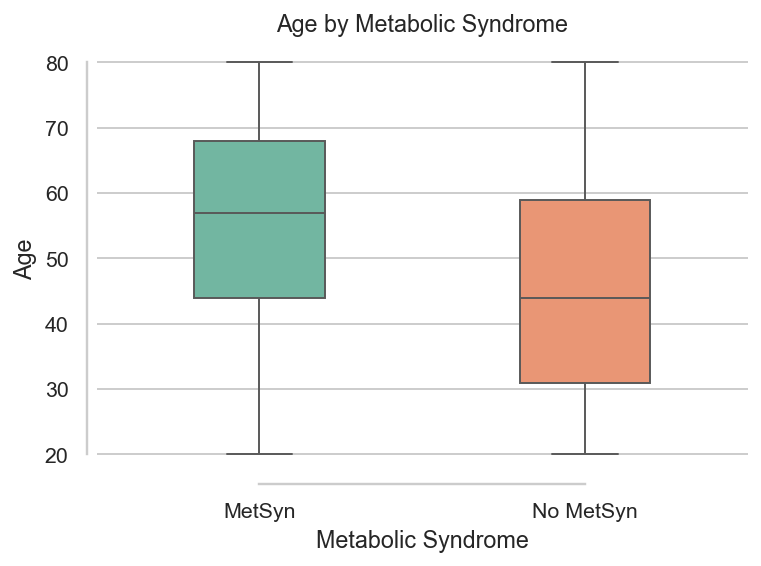

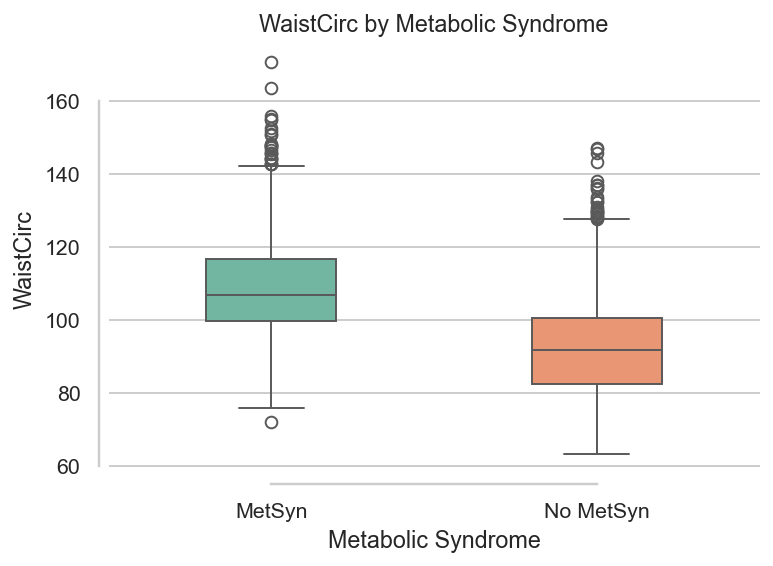

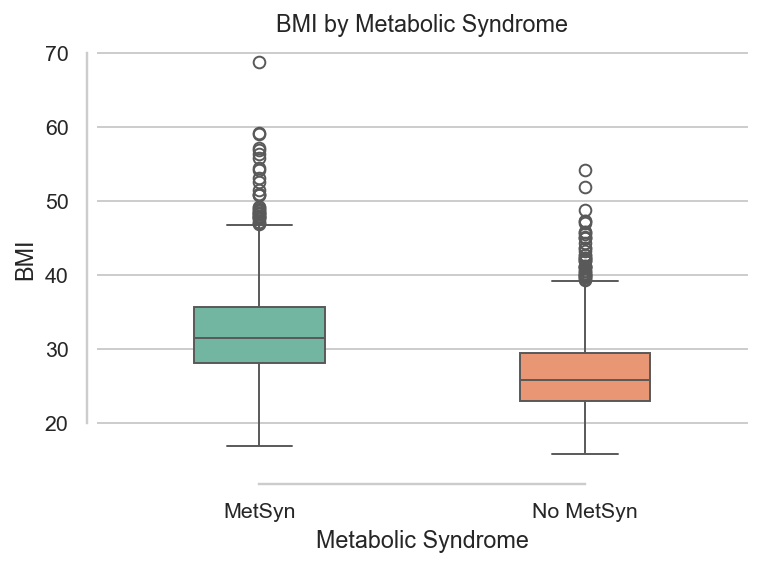

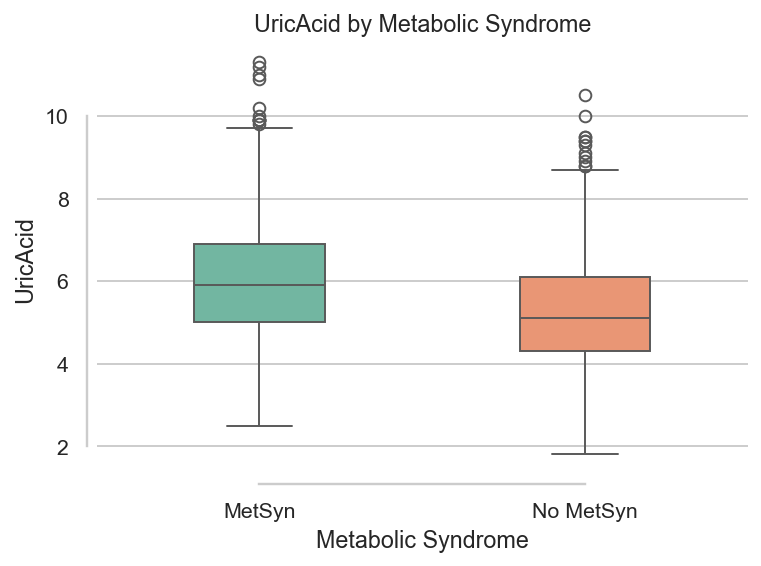

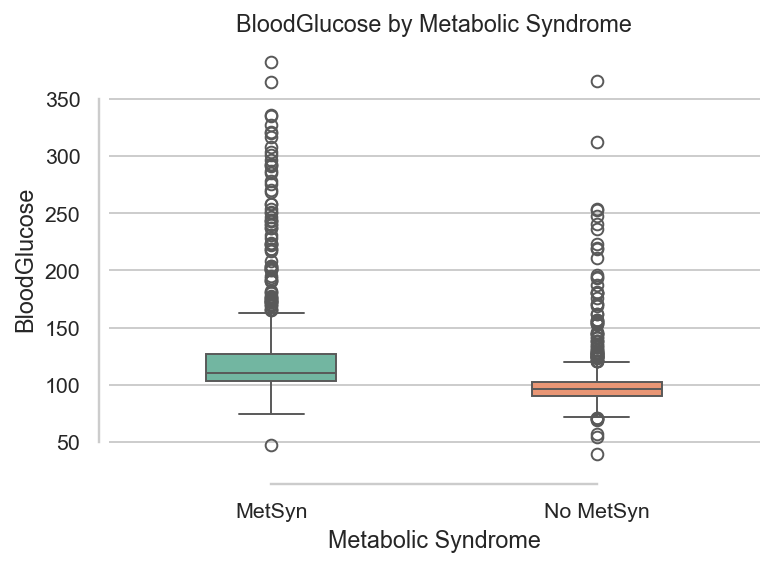

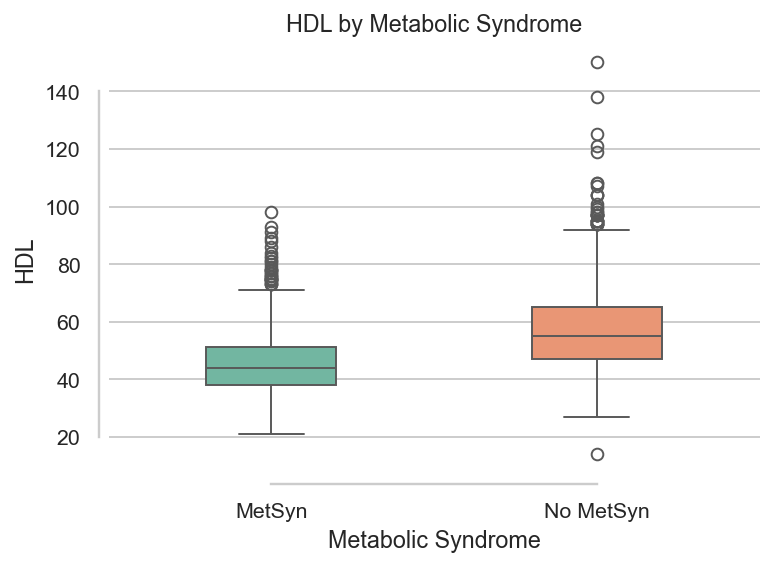

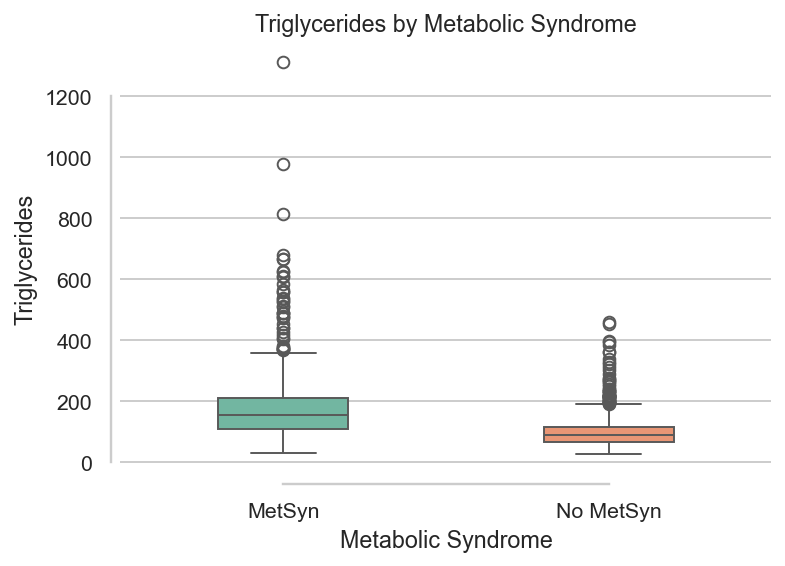

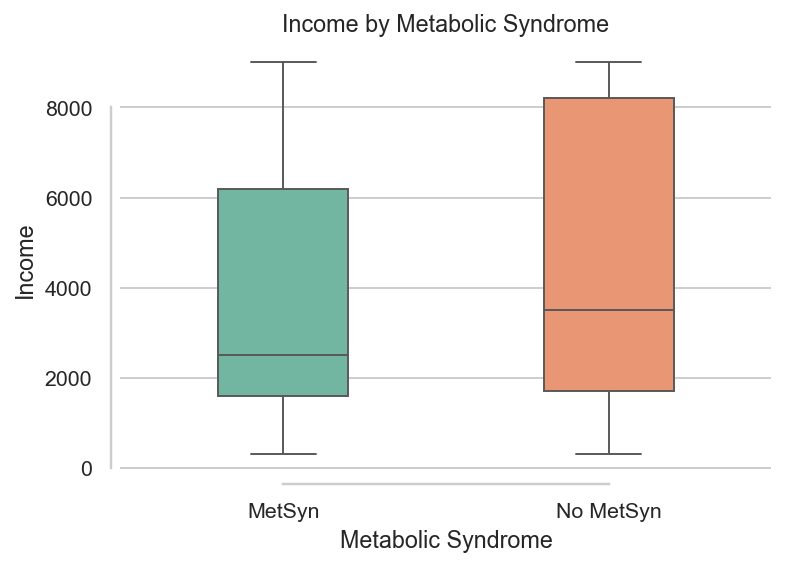

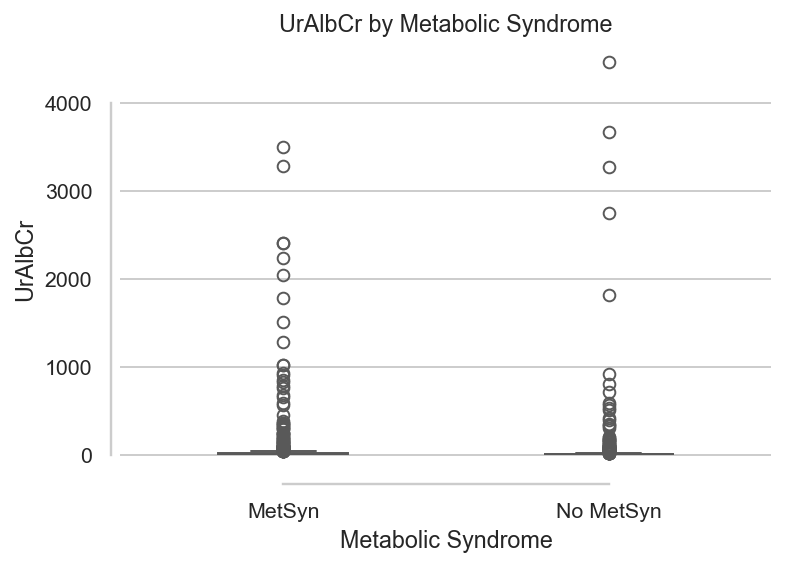

In [38]:
# 4. What factor is the most linked to metabolic syndrome?
# Numerical Variables
num_vars = ["Age","WaistCirc","BMI","UricAcid","BloodGlucose","HDL","Triglycerides", "Income", "UrAlbCr"] # Repeating here for clarity

# Let´s observe its distribution by Metabolic Syndrome presence
for col in num_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        data=df,
        x="MetabolicSyndrome",
        y=col,
        hue="MetabolicSyndrome",   
        palette="Set2",
        width=0.4,
        legend=False                
    )
    plt.title(f"{col} by Metabolic Syndrome")
    plt.xlabel("Metabolic Syndrome")
    plt.ylabel(col)
    sns.despine(offset=5, trim=True)
    plt.show()
    

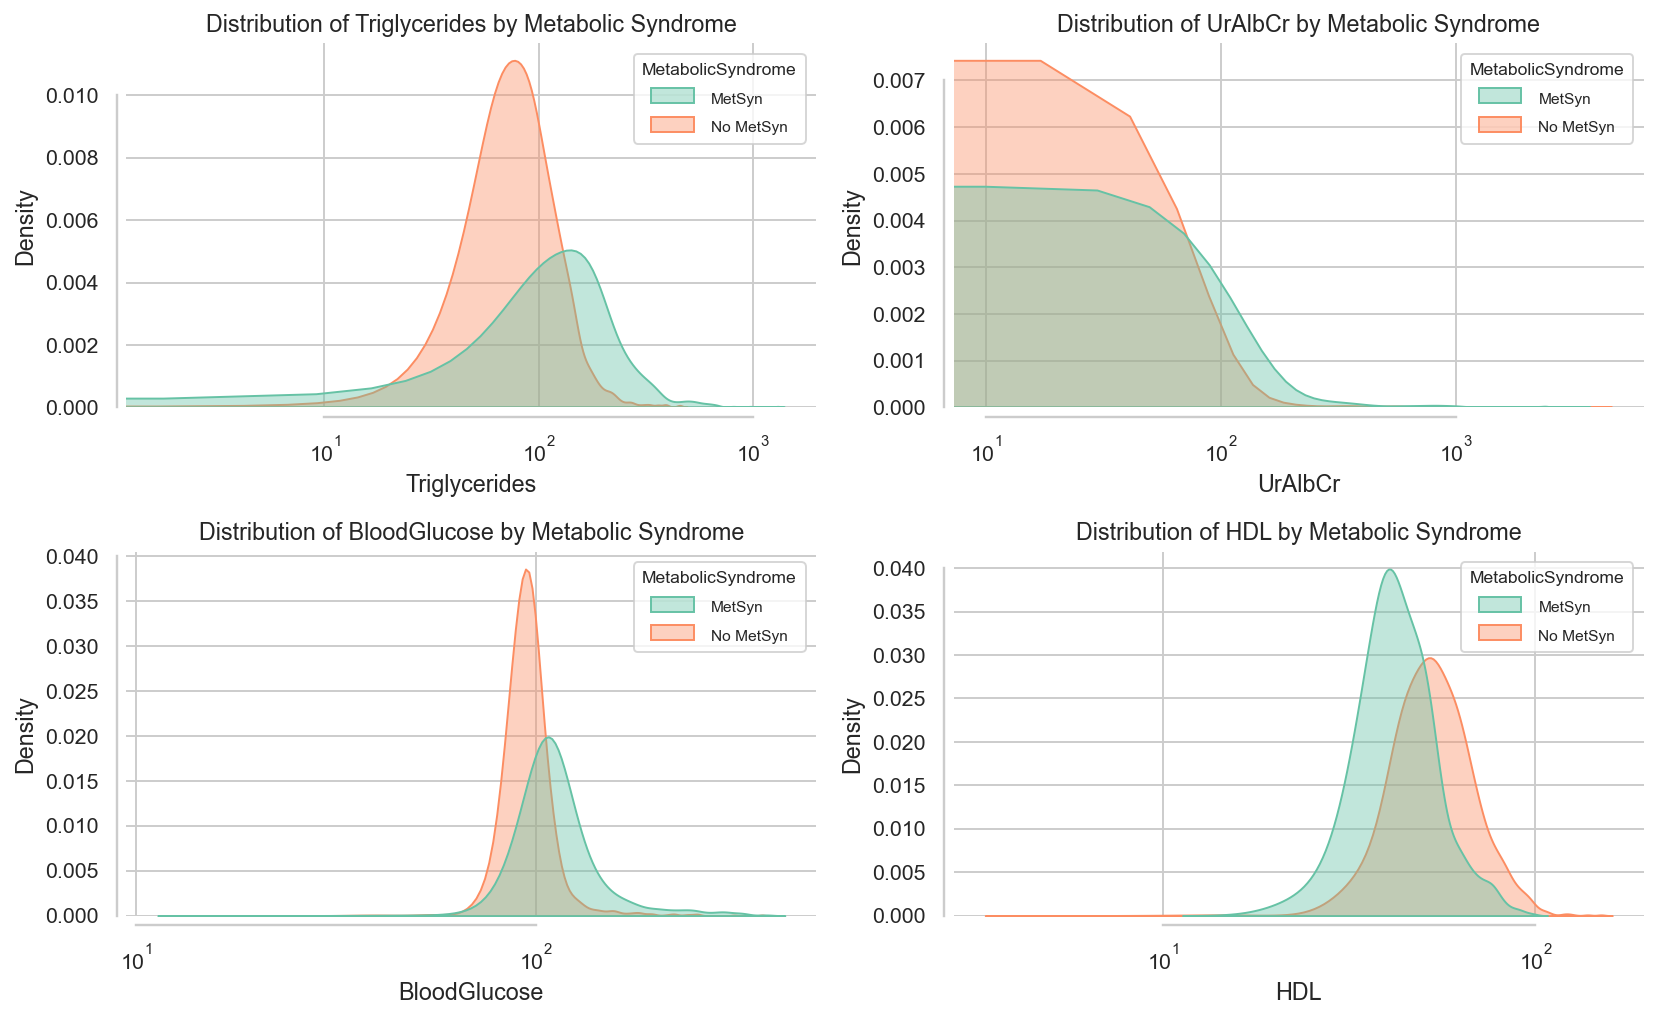

In [41]:
# For the highly skewed variables, let´s find another plot that fits them better (a Kernel Density Estimate plot).
from math import ceil
skewed_vars = ["Triglycerides", "UrAlbCr", "BloodGlucose", "HDL"] 

# Settings
palette = "Set2"
n = len(skewed_vars)
ncols = 2
nrows = ceil(n / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
axes = np.array(axes).reshape(nrows, ncols)

for i, col in enumerate(skewed_vars):
    r, c = divmod(i, ncols)
    ax = axes[r, c]

    # Mathematical settings: drop  NaNs and if logged, keep > 0 
    plot_df = df[["MetabolicSyndrome", col]].dropna()
    if col in skewed_vars:
        plot_df = plot_df[plot_df[col] > 0]

    # KDE with filled area
    sns.kdeplot(
        data=plot_df,
        x=col,
        hue="MetabolicSyndrome",
        fill=True,
        common_norm=False,
        alpha=0.4,
        palette=palette,
        ax=ax
    )

    # Move legend to the right, and smaller font
    leg = ax.get_legend()
    if leg is not None:
        leg.get_title().set_fontsize(9)
        for text in leg.get_texts():
            text.set_fontsize(8)

    # Log scale for skewed variables
    if col in skewed_vars:
        ax.set_xscale("log")

    ax.set(
        title=f"Distribution of {col} by Metabolic Syndrome",
        xlabel=col,
        ylabel="Density"
    )
    sns.despine(ax=ax, offset=5, trim=True)


plt.tight_layout(rect=(0, 0, 1, 0.93))
plt.show()

In [42]:
# Summary statistics by Metabolic Syndrome status
num_vars = [
    "Age", "WaistCirc", "BMI", "UricAcid",
    "BloodGlucose", "HDL", "Triglycerides",
    "Income", "UrAlbCr"
]

summary_stats = (
    df.groupby("MetabolicSyndrome")[num_vars]
      .agg(["mean", "max", "min", "std"])
      .round(2)
)
display(summary_stats.T)   # If we do not transpose, it doesn´t show all results, so with this format we can see all statistics at the same time


C:\Users\felif\AppData\Local\Temp\ipykernel_4044\1115791774.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("MetabolicSyndrome")[num_vars]


MetabolicSyndrome    MetSyn  No MetSyn
Age           mean    55.77      45.69
              max     80.00      80.00
              min     20.00      20.00
              std     15.53      17.38
WaistCirc     mean   109.33      92.59
              max    170.50     147.00
              min     72.00      63.10
              std     14.88      13.83
BMI           mean    32.57      26.63
              max     68.70      54.20
              min     16.90      15.70
              std      6.72       5.46
UricAcid      mean     5.98       5.23
              max     11.30      10.50
              min      2.50       1.80
              std      1.49       1.32
BloodGlucose  mean   125.11      98.62
              max    382.00     366.00
              min     47.00      39.00
              std     44.19      20.80
HDL           mean    46.04      57.68
              max     98.00     150.00
              min     21.00      14.00
              std     12.01      14.90
Triglycerides mean   180.47      97.48
              max   1311.00     461.00
              min     31.00      26.00
              std    118.75      48.17
Income        mean  3749.30    4365.61
              max   9000.00    9000.00
              min    300.00     300.00
              std   2815.86    3052.36
UrAlbCr       mean    66.12      29.15
              max   3500.00    4462.81
              min      1.47       1.40
              std    285.51     212.37

In [44]:
# Now, let´s compute the mean differences for each numerical variable between MetSyn and No MetSyn groups.
df["MetSyn_binary"] = (df["MetabolicSyndrome"] == "MetSyn").astype(int) # Creates a binary variable: 1 = MetSyn, 0 = No MetSyn

# Means by group (0 = No MetSyn, 1 = MetSyn)
means = df.groupby("MetSyn_binary")[num_vars].mean()

# Difference = MetSyn minus No MetSyn
diff = (means.loc[1] - means.loc[0]).to_frame("Mean_Difference")
diff["Direction"] = np.where(diff["Mean_Difference"] > 0, "Higher in MetSyn", "Lower in MetSyn")

display(diff.sort_values("Mean_Difference", ascending=False).round(2))



,Mean_Difference,Direction
Triglycerides,82.99,Higher in MetSyn
UrAlbCr,36.96,Higher in MetSyn
BloodGlucose,26.49,Higher in MetSyn
WaistCirc,16.74,Higher in MetSyn
Age,10.08,Higher in MetSyn
BMI,5.94,Higher in MetSyn
UricAcid,0.75,Higher in MetSyn
HDL,-11.64,Lower in MetSyn
Income,-616.32,Lower in MetSyn


In [45]:
# But, is it statistically significant? We can do t-tests to check it.
from scipy.stats import ttest_ind

significance = {}

for col in num_vars:
    group1 = df[df["MetSyn_binary"] == 1][col].dropna()
    group0 = df[df["MetSyn_binary"] == 0][col].dropna()

    tstat, pval = ttest_ind(group1, group0, equal_var=False)  # t-test
    significance[col] = pval

sig_df = (
    pd.Series(significance, name="p-value")
      .to_frame()
      .assign(Significant=lambda x: x["p-value"] < 0.05)
      .sort_values("p-value")
)

display(sig_df.round(4))


,p-value,Significant
WaistCirc,0.0000,True
BMI,0.0000,True
HDL,0.0000,True
Triglycerides,0.0000,True
BloodGlucose,0.0000,True
Age,0.0000,True
UricAcid,0.0000,True
Income,0.0000,True
UrAlbCr,0.0025,True


In [46]:
""" Explanation: The mean comparison across groups shows strong positive SIGNIFICANT differences for Triglycerides, UrAlbCr, Blood glucose,
Waist circumference, Age and BMI, indicating these variables are substantially higher among individuals with the Metabolic 
Syndrome. Conversely, HDL cholesterol and Income exhibit a marked negative gap, consistent with its inverse relation to metabolic risk.
Finally, for UricAcid, there is a small positive difference, suggesting a mild association with metabolic syndrome. """

' Explanation: The mean comparison across groups shows strong positive SIGNIFICANT differences for Triglycerides, UrAlbCr, Blood glucose,\nWaist circumference, Age and BMI, indicating these variables are substantially higher among individuals with the Metabolic \nSyndrome. Conversely, HDL cholesterol and Income exhibit a marked negative gap, consistent with its inverse relation to metabolic risk.\nFinally, for UricAcid, there is a small positive difference, suggesting a mild association with metabolic syndrome. '

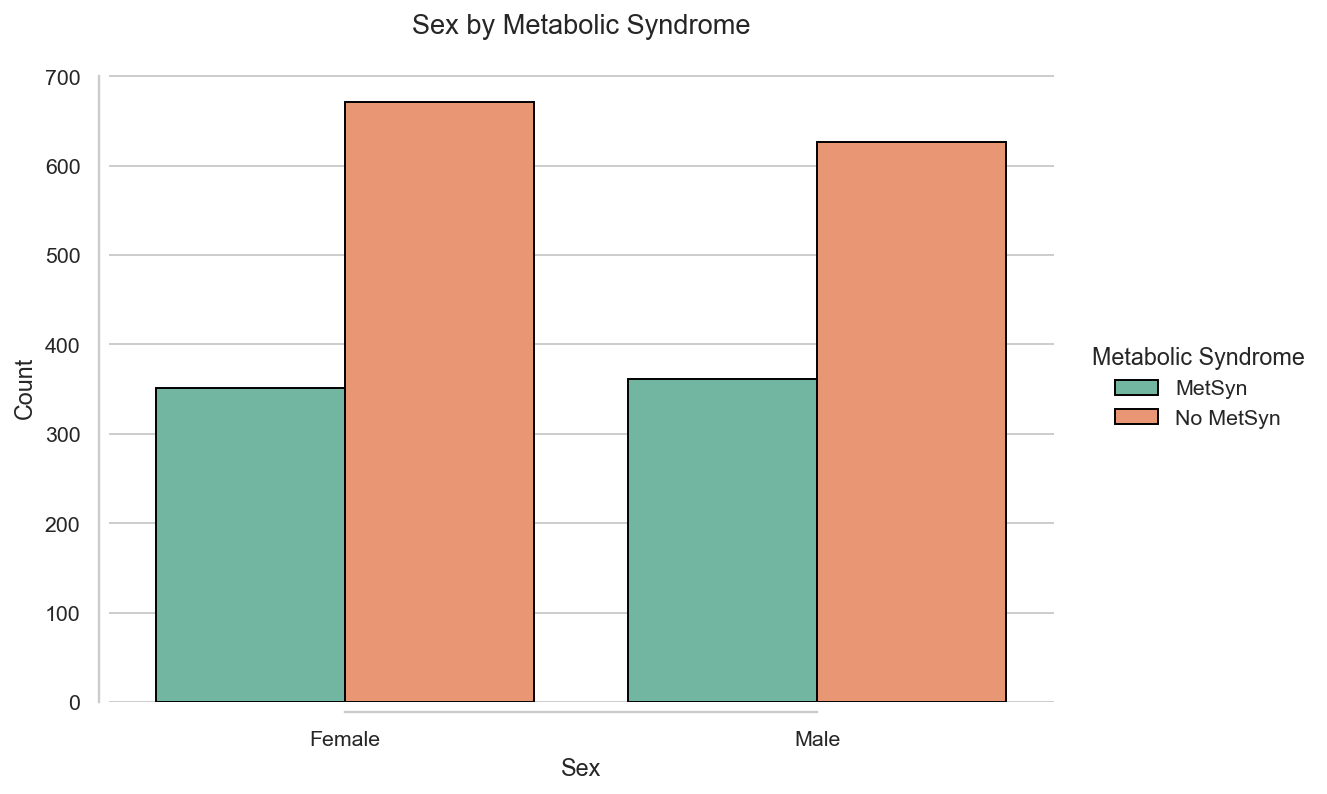

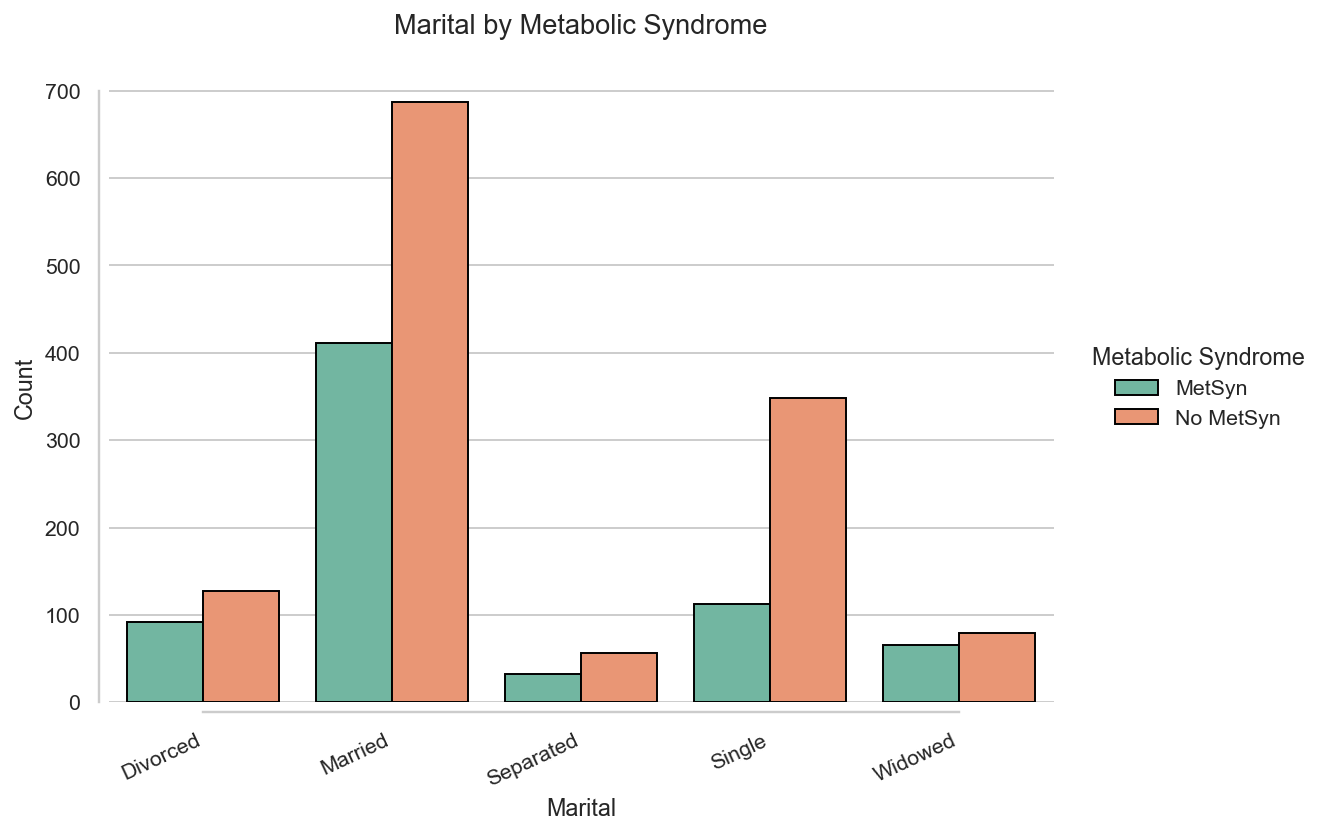

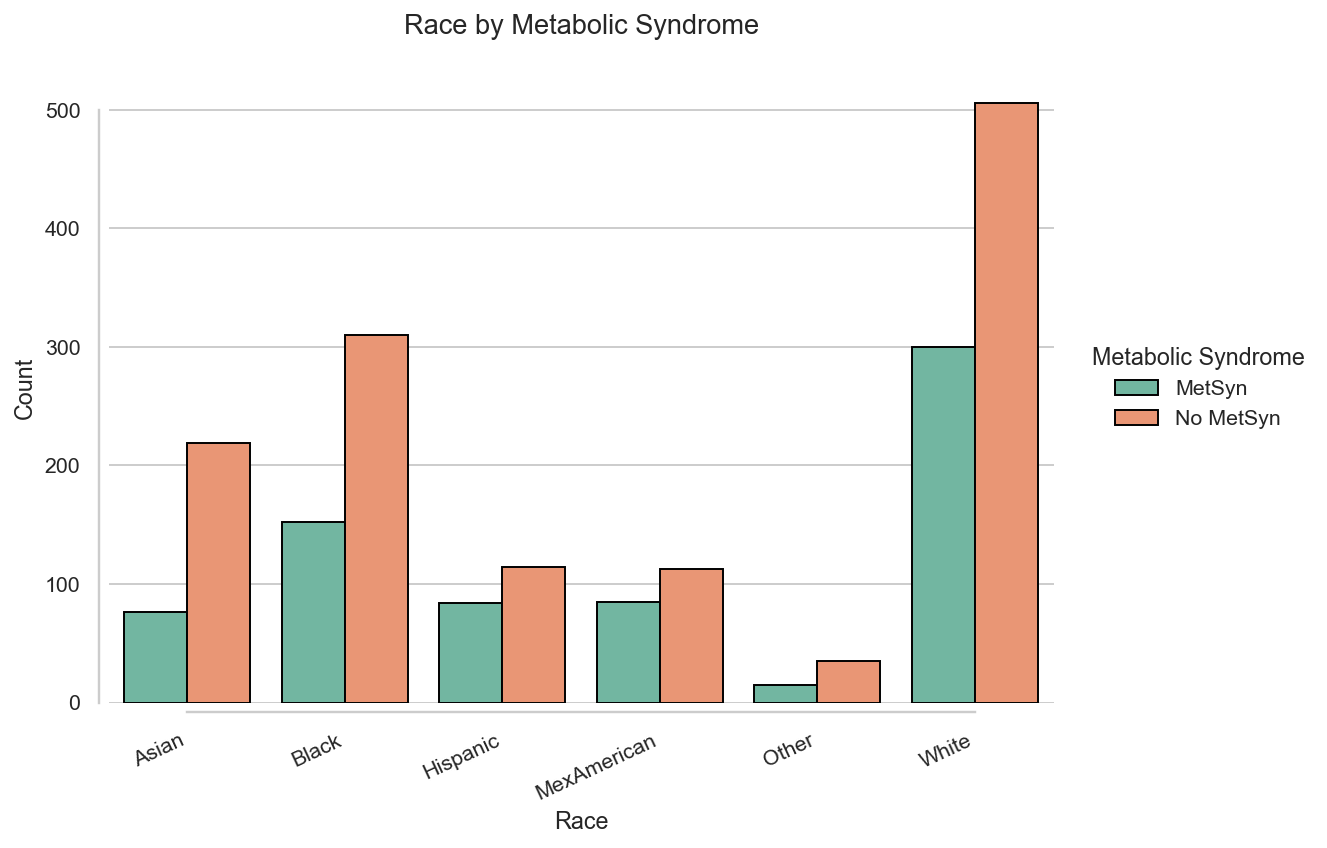

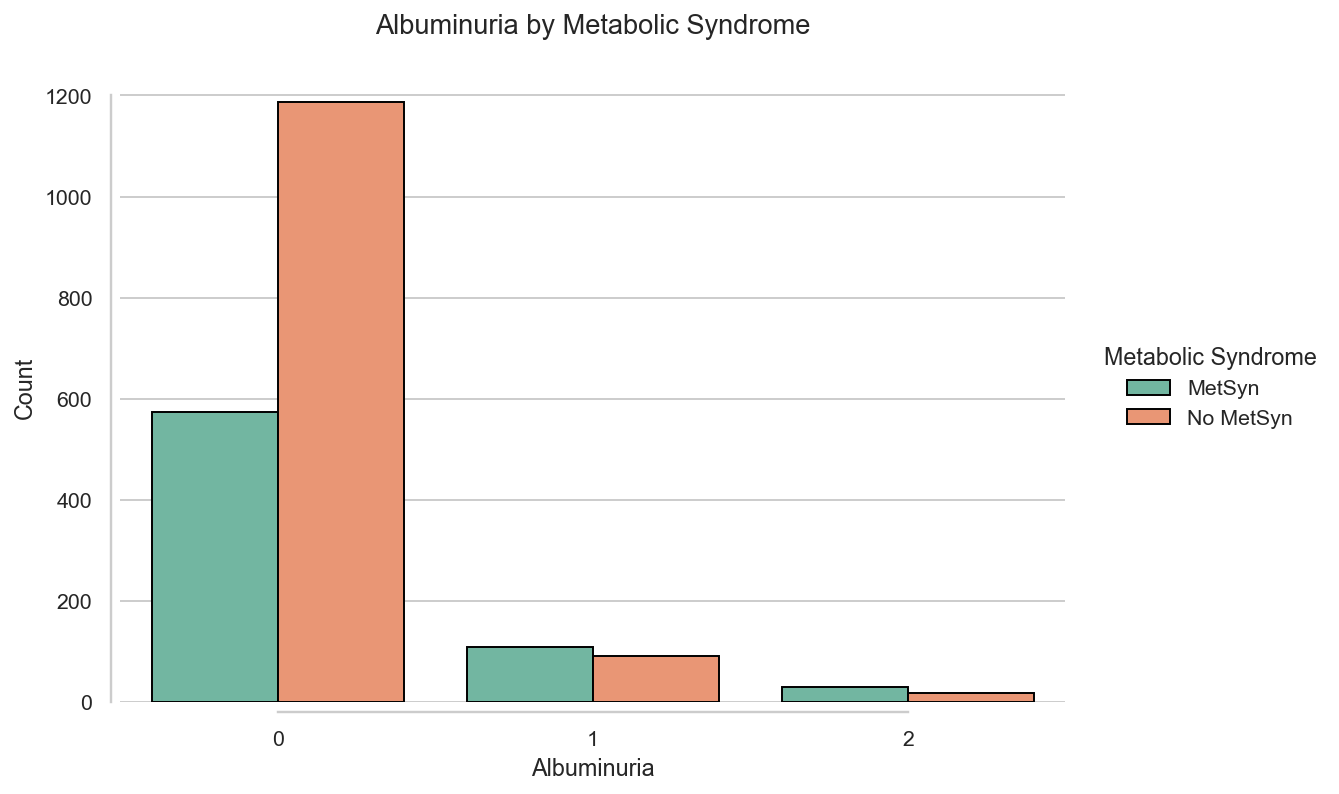

In [47]:
# Categorical Variables and the Metabolic Syndrome.
cat_vars = ["Sex", "Marital", "Race", "Albuminuria"]

# Let´s observe its distribution by Metabolic Syndrome presence
for col in cat_vars:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.countplot(
        data=df,
        x=col,
        hue="MetabolicSyndrome",
        palette="Set2",
        edgecolor="black",
        ax=ax
    )
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.set_title(f"{col} by Metabolic Syndrome", fontsize=14, pad=20)
    sns.despine(ax=ax, offset=5, trim=True)

    if df[col].nunique() > 3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25, ha="right")

    # Nicer formatting for legend
    plt.subplots_adjust(right=0.8, top=0.9, bottom=0.15)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
        handles,
        labels,
        title="Metabolic Syndrome",
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),  
        frameon=False,
        fontsize=11,
        title_fontsize=12
    )

    plt.show()




In [49]:
# Categorical variable summary statistics by Metabolic Syndrome
cat_vars = ["Sex", "Marital", "Race", "Albuminuria"]

cat_summary = {}

for col in cat_vars:
    table = pd.crosstab(df[col], df["MetabolicSyndrome"], normalize="index") * 100
    table = table.rename(columns={"MetSyn": "% with MetSyn", "No MetSyn": "% without MetSyn"})
    cat_summary[col] = table.round(1)
    print(f"\n{col} – within-category prevalence of Metabolic Syndrome (%):")
    display(cat_summary[col])



Sex – within-category prevalence of Metabolic Syndrome (%):


MetabolicSyndrome,% with MetSyn,% without MetSyn
Sex,,
Female,34.3,65.7
Male,36.6,63.4



Marital – within-category prevalence of Metabolic Syndrome (%):


MetabolicSyndrome,% with MetSyn,% without MetSyn
Marital,,
Divorced,42.0,58.0
Married,37.4,62.6
Separated,36.4,63.6
Single,24.3,75.7
Widowed,45.1,54.9



Race – within-category prevalence of Metabolic Syndrome (%):


MetabolicSyndrome,% with MetSyn,% without MetSyn
Race,,
Asian,25.8,74.2
Black,32.9,67.1
Hispanic,42.4,57.6
MexAmerican,42.9,57.1
Other,30.0,70.0
White,37.2,62.8



Albuminuria – within-category prevalence of Metabolic Syndrome (%):


MetabolicSyndrome,% with MetSyn,% without MetSyn
Albuminuria,,
0,32.6,67.4
1,54.0,46.0
2,62.5,37.5


In [50]:
# Within-category prevalence of metabolic syndrome, to find the categorical variable with the highest gap
diff_rows = []
for col in cat_vars:
    tab = pd.crosstab(df[col], df["MetabolicSyndrome"], normalize="index") * 100
    if "MetSyn" in tab.columns:
        gap = tab["MetSyn"].max() - tab["MetSyn"].min()
        top_cat = tab["MetSyn"].idxmax()
        low_cat = tab["MetSyn"].idxmin()
        diff_rows.append({
            "Variable": col,
            "Highest category": top_cat,
            "Lowest category": low_cat,
            "Gap (pp)": round(gap, 1)
        })

cat_diff = pd.DataFrame(diff_rows).sort_values("Gap (pp)", ascending=False)
display(cat_diff)


,Variable,Highest category,Lowest category,Gap (pp)
3,Albuminuria,2,0,29.9
1,Marital,Widowed,Single,20.8
2,Race,MexAmerican,Asian,17.2
0,Sex,Male,Female,2.2


In [52]:
from scipy.stats import chi2_contingency
chi_results = []

for col in cat_vars:
    table = pd.crosstab(df[col], df["MetabolicSyndrome"])
    chi2, p, dof, expected = chi2_contingency(table)
    chi_results.append({
        "Variable": col,
        "p-value": p,
        "Significant": p < 0.05
    })

chi_df = pd.DataFrame(chi_results).sort_values("p-value")
display(chi_df)


,Variable,p-value,Significant
3,Albuminuria,5.930581e-12,True
1,Marital,2.053835e-07,True
2,Race,1.973308e-04,True
0,Sex,3.180409e-01,False


In [53]:
""" Categorical variables show heterogeneous patterns of association with Metabolic Syndrome.
Albuminuria displays the strongest gradient, with nearly a 30 percentage point difference between the 
highest and lowest categories, highlighting its strong clinical link with metabolic risk.
Marital status and race show moderate gaps (around 20 pp and 17 pp respectively), whereas gender differences are minimal (around 2 pp)."""

' Categorical variables show heterogeneous patterns of association with Metabolic Syndrome.\nAlbuminuria displays the strongest gradient, with nearly a 30 percentage point difference between the \nhighest and lowest categories, highlighting its strong clinical link with metabolic risk.\nMarital status and race show moderate gaps (around 20 pp and 17 pp respectively), whereas gender differences are minimal (around 2 pp).'

Association strength (numeric: Pearson r, categorical: Cramér’s V):


WaistCirc        0.491204
Triglycerides    0.442063
BMI              0.431918
BloodGlucose     0.376842
HDL             -0.370963
Age              0.276692
UricAcid         0.250926
Albuminuria      0.157326
Marital          0.127654
Income          -0.098800
Race             0.097818
UrAlbCr          0.073257
Sex              0.000000
dtype: float64

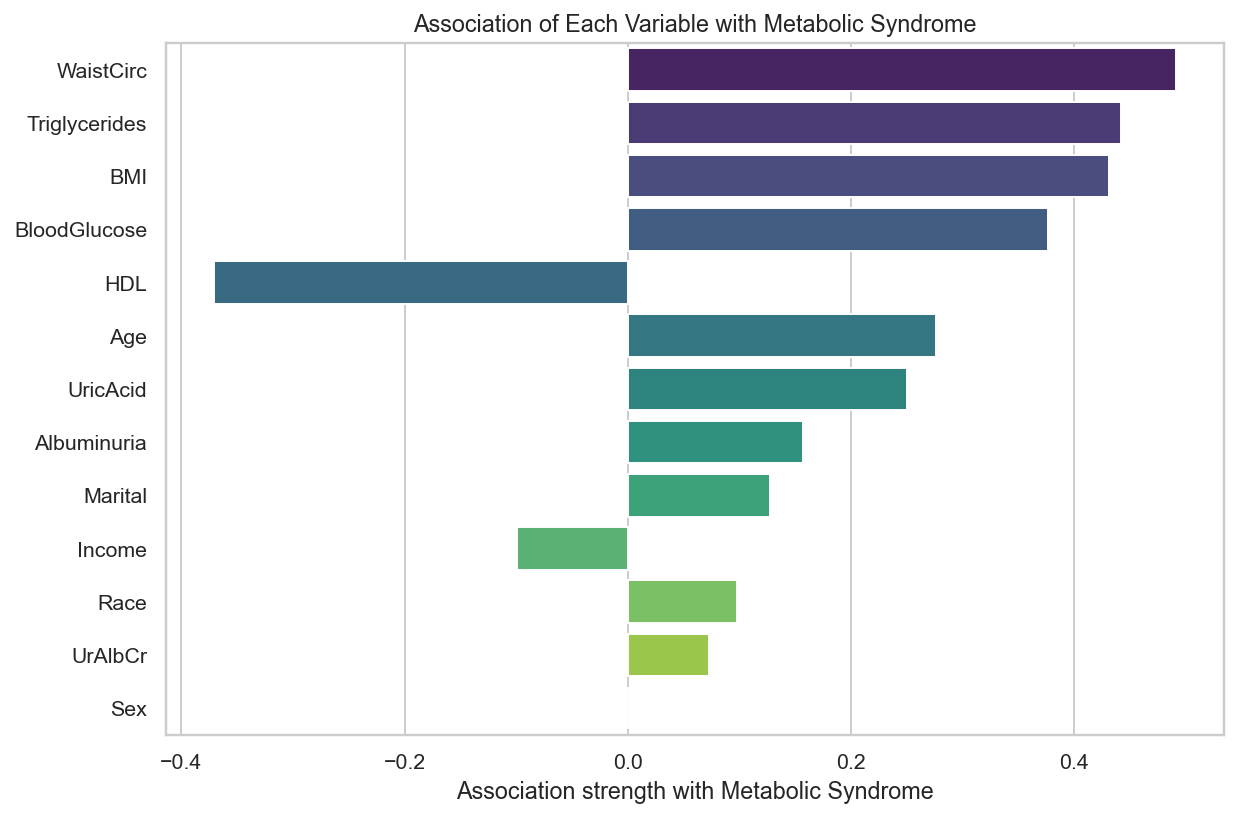

In [54]:
# Overall correlation with MetSyndrome: how strongly is each variable related to the presence of metabolic syndrome?

num_vars = [
    "Age", "WaistCirc", "BMI", "UricAcid",
    "BloodGlucose", "HDL", "Triglycerides",
    "Income", "UrAlbCr"
]                                                      # Make sure variables are well-defined

cat_vars = ["Sex", "Marital", "Race", "Albuminuria"]   # Make sure variables are well-defined

df["MetSyn_binary"] = (df["MetabolicSyndrome"] == "MetSyn").astype(int)

# Pearson correlations for numeric variables 
corr_vars = {}
for col in num_vars:
    temp = df[[col, "MetSyn_binary"]].dropna()
    if temp["MetSyn_binary"].nunique() > 1:
        corr_vars[col] = temp[col].corr(temp["MetSyn_binary"])
    else:
        corr_vars[col] = np.nan

# Cramer's V for categorical variables
def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = conf_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

for col in cat_vars:
    table = pd.crosstab(df[col], df["MetabolicSyndrome"])
    corr_vars[col] = cramers_v(table)

# Combine results
link_strength = pd.Series(corr_vars).sort_values(key=lambda s: s.abs(), ascending=False)
print("Association strength (numeric: Pearson r, categorical: Cramér’s V):")
display(link_strength)

# Plot
plt.figure(figsize=(9,6))
sns.barplot(
    x=link_strength.values,
    y=link_strength.index,
    hue=link_strength.index,
    orient="h",
    palette="viridis",
    legend=False
)
plt.title("Association of Each Variable with Metabolic Syndrome")
plt.xlabel("Association strength with Metabolic Syndrome")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [56]:
""" These results corroborate earlier findings, highlighting WaistCirc, Triglycerides, BMI, Blood Glucose and HDL as the variables 
most strongly linked to metabolic syndrome. Also, they confirm the importance of these main indicators for MetSyn diagnosis. """

' These results corroborate earlier findings, highlighting WaistCirc, Triglycerides, BMI, Blood Glucose and HDL as the variables \nmost strongly linked to metabolic syndrome. Also, they confirm the importance of these main indicators for MetSyn diagnosis. '


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       389
           1       0.84      0.76      0.80       214

    accuracy                           0.87       603
   macro avg       0.86      0.84      0.85       603
weighted avg       0.86      0.87      0.86       603

Confusion Matrix:
[[359  30]
 [ 51 163]]


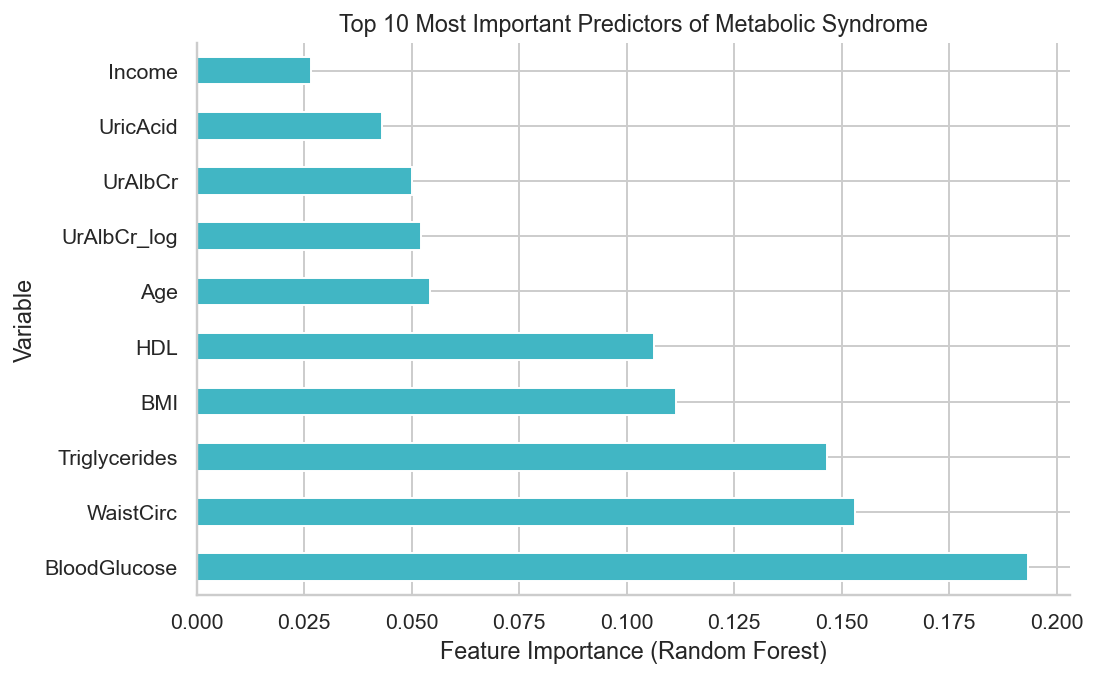

In [57]:
# 5. Classification model to predict Metabolic Syndrome presence - Random Forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# A. Original dataframe
df_model = df.copy()

# B. Target: binary Metabolic Syndrome indicator
y = df_model["MetSyn_binary"]   # 0 = No MetSyn, 1 = MetSyn

# C. Drop the original string target to avoid encoding it as a feature
df_model = df_model.drop(columns=["MetabolicSyndrome"])

# D. Features
df_model = pd.get_dummies(df_model, drop_first=True)
X = df_model.drop(columns=["MetSyn_binary"])

# E. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# F. Random Forest model
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    class_weight="balanced"
)
model.fit(X_train, y_train)

# G. Predictions and evaluation
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# H. Plot
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

plt.figure(figsize=(8, 5))
feat_importances.sort_values(ascending=False).head(10).plot(
    kind="barh",
    color="#41b6c4"
)
plt.title("Top 10 Most Important Predictors of Metabolic Syndrome")
plt.xlabel("Feature Importance (Random Forest)")
plt.ylabel("Variable")
sns.despine()
plt.tight_layout()
plt.show()



END OF THE ANALYSIS